# Consignes Projet 4

**Anticipez les besoins en consommation électrique de bâtiments**
* Lien vers consignes : https://openclassrooms.com/fr/projects/629/assignment
* Lien vers données : https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv
* Lien vers score Star Energy : https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what

* Lien vers la signification des colonnes (trouvé via recherche web) : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

In [2]:
import json  
from pandas.io.json import json_normalize  

## Data

In [3]:
data_2015 = pd.read_csv('data/2015-building-energy-benchmarking.csv')
data_2016 = pd.read_csv('data/2016-building-energy-benchmarking.csv')

In [4]:
print(data_2015.shape)
print(data_2016.shape)

(3340, 47)
(3376, 46)


## Metadata

In [5]:
with open('data/socrata_metadata_2015-building-energy-benchmarking.json') as jsonfile:
    metadata_2015_json = json.load(jsonfile)
    metadata_2015 = json_normalize(metadata_2015_json)

with open('data/socrata_metadata_2016-building-energy-benchmarking.json') as jsonfile:
    metadata_2016_json = json.load(jsonfile)
    metadata_2016 = json_normalize(metadata_2016_json)

In [6]:
metadata_2015

description  \
0  Seattle’s Building Energy Benchmarking and Reporting Program (SMC 22.920) requires owners of non-residential and multifamily buildings (20,000 square feet or larger) to track energy performance and annually report to the City of Seattle. Buildings account for 33% of Seattle's core emissions. The benchmarking policy supports Seattle's goals to reduce energy use and greenhouse gas emissions from existing buildings. In 2013, the City of Seattle adopted a Climate Action Plan to achieve zero net greenhouse gas (GHG) emissions by 2050. Annual benchmarking, reporting and disclosing of building performance are foundational elements of creating more market value for energy efficiency.\r\nPer Ordinance (125000), starting with 2015 energy use performance reporting, the City of Seattle will make the data for all building 20,000 SF and larger available annually. This update to the benchmarking mandate was passed by Seattle City Council on February 29, 2016.\r\n\r\nIf you have questions or comments on the data, email us at energybenchmarking@seattle.gov and include Open Data in the subject line.   

   rowsUpdatedAt  viewLastModified      licenseId displayType  \
0  1521489255     1557955129        PUBLIC_DOMAIN  table        

   totalTimesRated      attribution  downloadCount provenance  \
0  0                City of Seattle  1901           official    

   hideFromCatalog  \
0  False             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [7]:
metadata_2015['Year'] = 2015
metadata_2016['Year'] = 2016

In [8]:
metadata = pd.concat([metadata_2015, metadata_2016], axis=0, sort=True).reset_index().drop(['index'], axis=1)

In [9]:
metadata

Year  \
0  2015   
1  2016   

                                                                                                                                                                                                                                                                                                                                                                                                                                      approvals  \
0  [{'submissionDetails': {'permissionType': 'READ'}, 'submitter': {'id': '9yyf-ecsx', 'displayName': 'Sullivan, Terry'}, 'submissionId': 331106, 'state': 'approved', 'workflowId': 623, 'reviewedAutomatically': True, 'submittedAt': 1521489624, 'reviewedAt': 1521489624, 'submissionOutcomeApplication': {'failureCount': 0, 'status': 'success'}, 'submissionOutcome': 'change_audience', 'submissionObject': 'public_audience_request'}]   
1  [{'submissionDetails': {'permissionType': 'READ'}, 'submitter': {'id': '9yyf-ecsx', 'displayName': 'Sullivan, Terry'}, 'submissionId': 331104, 'state': 'approved', 'workflowId': 623, 'reviewedAutomatically': True, 'submittedAt': 1521071079, 'reviewedAt': 1521071079, 'submissionOutcomeApplication': {'failureCount': 0, 'status': 'success'}, 'submissionOutcome': 'change_audience', 'submissionObject': 'public_audience_request'}]   

       attribution                             attributionLink  averageRating  \
0  City of Seattle  http://www.seattle.gov/environment          0               
1  City of Seattle  https://www.seattle.gov/energybenchmarking  0               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [10]:
pd.DataFrame(metadata['columns'].values.tolist()[0][0])

,description,dataTypeName,renderTypeName,width,position,format,fieldName,tableColumnId,id,cachedContents,name
noCommas,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,182,1,true,seattlebuildingid,46302822,350402298,NaN,OSEBuildingID
precisionStyle,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,182,1,standard,seattlebuildingid,46302822,350402298,NaN,OSEBuildingID
align,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,182,1,right,seattlebuildingid,46302822,350402298,NaN,OSEBuildingID
smallest,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,182,1,NaN,seattlebuildingid,46302822,350402298,1,OSEBuildingID
cardinality,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,182,1,NaN,seattlebuildingid,46302822,350402298,3340,OSEBuildingID
sum,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,182,1,NaN,seattlebuildingid,46302822,350402298,68544042,OSEBuildingID
null,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,182,1,NaN,seattlebuildingid,46302822,350402298,0,OSEBuildingID
non_null,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,182,1,NaN,seattlebuildingid,46302822,350402298,3340,OSEBuildingID
not_null,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,182,1,NaN,seattlebuildingid,46302822,350402298,3340,OSEBuildingID
top,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,182,1,NaN,seattlebuildingid,46302822,350402298,"[{'count': '1', 'item': '2'}, {'count': '1', 'item': '3'}, {'count': '1', 'item': '5'}, {'count': '1', 'item': '8'}, {'count': '1', 'item': '9'}, {'count': '1', 'item': '10'}, {'count': '1', 'item': '11'}, {'count': '1', 'item': '12'}, {'count': '1', 'item': '13'}, {'count': '1', 'item': '15'}, {'count': '1', 'item': '16'}, {'count': '1', 'item': '17'}, {'count': '1', 'item': '18'}, {'count': '1', 'item': '19'}, {'count': '1', 'item': '21'}, {'count': '1', 'item': '22'}, {'count': '1', 'item': '23'}, {'count': '1', 'item': '24'}, {'count': '1', 'item': '25'}, {'count': '1', 'item': '26'}]",OSEBuildingID


In [11]:
pd.DataFrame(metadata['columns'].values.tolist()[1][0])

,description,dataTypeName,renderTypeName,format,position,fieldName,tableColumnId,id,cachedContents,name
groupSeparator,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,,1,osebuildingid,62418341,349768636,NaN,OSEBuildingID
smallest,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,NaN,1,osebuildingid,62418341,349768636,1,OSEBuildingID
sum,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,NaN,1,osebuildingid,62418341,349768636,71601554,OSEBuildingID
null,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,NaN,1,osebuildingid,62418341,349768636,0,OSEBuildingID
non_null,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,NaN,1,osebuildingid,62418341,349768636,3376,OSEBuildingID
top,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,NaN,1,osebuildingid,62418341,349768636,"[{'count': 20, 'item': '50201'}, {'count': 19, 'item': '50204'}, {'count': 18, 'item': '50207'}, {'count': 17, 'item': '50208'}, {'count': 16, 'item': '50210'}, {'count': 15, 'item': '50212'}, {'count': 14, 'item': '50219'}, {'count': 13, 'item': '50220'}, {'count': 12, 'item': '50221'}, {'count': 11, 'item': '50222'}, {'count': 10, 'item': '50223'}, {'count': 9, 'item': '50224'}, {'count': 8, 'item': '50225'}, {'count': 7, 'item': '50226'}]",OSEBuildingID
largest,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,NaN,1,osebuildingid,62418341,349768636,50226,OSEBuildingID
average,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,number,number,NaN,1,osebuildingid,62418341,349768636,21208.99111374408,OSEBuildingID


# Nettoyage et Tri des features

## Préparation assemblage des 2 dataframes

### Uniformisation des colonnes des 2 dataframes

In [12]:
print('colonnes présentes sur données 2015 et absentes sur 2016 : \n', set(data_2015.columns) - set(data_2016.columns))
print('\ncolonnes présentes sur données 2016 et absentes sur 2015 : \n', set(data_2016.columns) - set(data_2015.columns))

colonnes présentes sur données 2015 et absentes sur 2016 : 
 {'City Council Districts', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Location', 'Zip Codes', 'SPD Beats', 'GHGEmissions(MetricTonsCO2e)', 'OtherFuelUse(kBtu)', 'Seattle Police Department Micro Community Policing Plan Areas'}

colonnes présentes sur données 2016 et absentes sur 2015 : 
 {'State', 'ZipCode', 'City', 'Latitude', 'Address', 'TotalGHGEmissions', 'Longitude', 'GHGEmissionsIntensity', 'Comments'}


#### Alignement des colonnes Location/State/City/Address/ZipCode/Latitude/longitude

In [13]:
data_2016['Comments'].nunique()

0

In [14]:
data_2015['Comment'].nunique()

13

In [15]:
data_2016.drop(['Comments'], axis=1, inplace=True)

On créée une fonction qui permet de récupérer les informations manquantes à partir de la colonne "Location"

In [16]:
import ast

def transform_columns (dataframe):
    '''Récupère les informations contenues dans la colonne Location pour les 
    ajouter dans des nouvelles colonnes du dataframe.
    La fonction renvoie le dataframe avec les nouvelles colonnes et l'ancienne
    purgée.
    '''
        
    #ajout des informations des colonnes manquantes
    location = pd.DataFrame()
    for line, building_id in zip(data_2015['Location'], data_2015['OSEBuildingID']):
        line = ast.literal_eval(line)
        line = json_normalize(line)
        
        latitude = line['latitude'][0]
        longitude = line['longitude'][0]

        line = pd.DataFrame(ast.literal_eval(line['human_address'][0]), index=[0])
        location = pd.concat([location,
                             pd.DataFrame({
                       'Building_id' : building_id,
                       'Address' : line['address'][0],
                       'City' : line['city'][0],
                       'State' : line['state'][0],
                       'ZipCode' : line['zip'][0],
                       'Latitude' : latitude,
                       'Longitude': longitude }, index=[0])],
                             axis=0)
    return pd.merge(dataframe, location, left_on = 'OSEBuildingID', 
                    right_on = 'Building_id').drop(['Building_id','Location'],axis=1)

In [17]:
data_2015 = transform_columns(data_2015)

In [18]:
print('colonnes présentes sur données 2015 et absentes sur 2016 : \n', set(data_2015.columns) - set(data_2016.columns))
print('\ncolonnes présentes sur données 2016 et absentes sur 2015 : \n', set(data_2016.columns) - set(data_2015.columns))

colonnes présentes sur données 2015 et absentes sur 2016 : 
 {'City Council Districts', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Zip Codes', 'SPD Beats', 'GHGEmissions(MetricTonsCO2e)', 'OtherFuelUse(kBtu)', 'Seattle Police Department Micro Community Policing Plan Areas'}

colonnes présentes sur données 2016 et absentes sur 2015 : 
 {'TotalGHGEmissions', 'GHGEmissionsIntensity'}


#### GHGEmissionsIntensity

In [19]:
data_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()

count    3330.000000
mean     0.985339   
std      1.637172   
min      0.000000   
25%      0.080000   
50%      0.460000   
75%      1.180000   
max      31.380000  
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [20]:
data_2015['GHGEmissions(MetricTonsCO2e)'].describe()

count    3330.000000 
mean     110.094102  
std      409.450179  
min      0.000000    
25%      9.265000    
50%      32.740000   
75%      88.642500   
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [21]:
data_2016['TotalGHGEmissions'].describe()

count    3367.000000 
mean     119.723971  
std      538.832227  
min     -0.800000    
25%      9.495000    
50%      33.920000   
75%      93.940000   
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [22]:
data_2016['GHGEmissionsIntensity'].describe()

count    3367.000000
mean     1.175916   
std      1.821452   
min     -0.020000   
25%      0.210000   
50%      0.610000   
75%      1.370000   
max      34.090000  
Name: GHGEmissionsIntensity, dtype: float64

L'unité des émissions de data_2016 est inconnue mais avec les ordres de grandeur, on voit qu'on peut aligner les deus features

In [23]:
data_2015['TotalGHGEmissions'] = data_2015['GHGEmissions(MetricTonsCO2e)']
data_2015['GHGEmissionsIntensity'] = data_2015['GHGEmissionsIntensity(kgCO2e/ft2)']
data_2015.drop(['GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)'], axis=1, inplace=True)

## Assemblage des 2 dataframes

### Vérifications des colonnes manquantes ou en trop

In [24]:
print('colonnes présentes sur données 2015 et absentes sur 2016 : \n', set(data_2015.columns) - set(data_2016.columns))
print('\ncolonnes présentes sur données 2016 et absentes sur 2015 : \n', set(data_2016.columns) - set(data_2015.columns))

colonnes présentes sur données 2015 et absentes sur 2016 : 
 {'City Council Districts', 'Comment', '2010 Census Tracts', 'Zip Codes', 'SPD Beats', 'OtherFuelUse(kBtu)', 'Seattle Police Department Micro Community Policing Plan Areas'}

colonnes présentes sur données 2016 et absentes sur 2015 : 
 set()


### Vérification des types

In [25]:
pd.DataFrame([data_2015.dtypes, data_2016.dtypes])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
0,int64,int64,object,object,object,object,int64,object,int64,int64,float64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,float64,float64,float64,float64,int64,object,object,object,object,object,object,float64,float64
1,int64,int64,object,object,object,object,int64,object,int64,float64,int64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,NaN,bool,NaN,object,object,NaN,NaN,NaN,NaN,NaN,object,object,object,float64,float64,float64,float64,float64


In [26]:
data_2015['DefaultData'] = data_2015['DefaultData'].map({'Yes' : True, 'No' : False}).head()

In [27]:
data_2015[['Latitude','Longitude', 'ZipCode']] = data_2015[['Latitude','Longitude', 'ZipCode']].astype('float64')

### Colonnes inutiles

In [28]:
data_2015[['Zip Codes', 'ZipCode']].head()

,Zip Codes,ZipCode
0,18081,98101.0
1,18081,98101.0
2,18081,98101.0
3,18081,98101.0
4,19576,98121.0


In [29]:
data_2015.drop(['Zip Codes'], axis=1, inplace=True)

### Assemblage

In [30]:
data = pd.concat([data_2015, data_2016], axis=0, sort=False)

In [31]:
data.shape

(6716, 51)

In [32]:
data.isna().sum().sum()

66678

## Types de colonnes

In [33]:
data.dtypes

OSEBuildingID                                                    int64  
DataYear                                                         int64  
BuildingType                                                     object 
PrimaryPropertyType                                              object 
PropertyName                                                     object 
TaxParcelIdentificationNumber                                    object 
CouncilDistrictCode                                              int64  
Neighborhood                                                     object 
YearBuilt                                                        int64  
NumberofBuildings                                                float64
NumberofFloors                                                   float64
PropertyGFATotal                                                 int64  
PropertyGFAParking                                               int64  
PropertyGFABuilding(s)                             

### Observations

In [34]:
for column in data.columns:
    if data[column].nunique()<20:
        print('Colonne {}, valeurs uniques :\n{}\n'.format(column, data[column].unique()))
    else:
        print('Colonne {}, {} valeurs uniques'.format(column, data[column].nunique()))

Colonne OSEBuildingID, 3432 valeurs uniques
Colonne DataYear, valeurs uniques :
[2015 2016]

Colonne BuildingType, valeurs uniques :
['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Multifamily LR (1-4)' 'Campus'
 'Multifamily HR (10+)' 'Nonresidential WA']

Colonne PrimaryPropertyType, 32 valeurs uniques
Colonne PropertyName, 6527 valeurs uniques
Colonne TaxParcelIdentificationNumber, 3729 valeurs uniques
Colonne CouncilDistrictCode, valeurs uniques :
[7 3 2 4 5 6 1]

Colonne Neighborhood, valeurs uniques :
['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'CENTRAL' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'SOUTHWEST' 'DELRIDGE' 'Central' 'Ballard' 'North' 'Delridge'
 'Northwest' 'DELRIDGE NEIGHBORHOODS']

Colonne YearBuilt, 113 valeurs uniques
Colonne NumberofBuildings, valeurs uniques :
[  1.   7.  11.  16.   4.   3.  39.   2.  10.   6.   0.  27.  14.   9.
   5.  nan   8.  23. 111.]

Colonne NumberofFloors, 5

In [35]:
data.drop(['City Council Districts', '2010 Census Tracts', 
           'Seattle Police Department Micro Community Policing Plan Areas'], 
          axis=1, inplace=True)

In [36]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,Comment,ComplianceStatus,Outlier,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,False,NaN,Compliant,NaN,31.0,405 OLIVE WAY,SEATTLE,WA,98101.0,47.612190,-122.337997,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,False,NaN,Compliant,NaN,31.0,724 PINE ST,SEATTLE,WA,98101.0,47.613106,-122.333358,263.51,2.38
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,True,NaN,Compliant,NaN,31.0,1900 5TH AVE,SEATTLE,WA,98101.0,47.613349,-122.337699,2061.48,1.92
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,False,NaN,Compliant,High Outlier,31.0,620 STEWART ST,SEATTLE,WA,98101.0,47.614216,-122.336609,1936.34,31.38
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,False,NaN,Compliant,NaN,31.0,401 LENORA ST,SEATTLE,WA,98121.0,47.613754,-122.340924,507.70,4.02


### Valeurs quasi identiques

In [37]:
data['PrimaryPropertyType'] = data['PrimaryPropertyType'].str.replace('\n','')

In [38]:
data['City'].replace('SEATTLE', 'Seattle', inplace=True)

In [39]:
data['ComplianceStatus'].replace('Missing Data', np.nan, inplace=True)
data['ComplianceStatus'].replace('Error - Correct Default Data', np.nan, inplace=True)
data['ComplianceStatus'].replace('Not Compliant', 'Non-Compliant', inplace=True)

In [40]:
data['Neighborhood'].replace('Central', 'CENTRAL', inplace=True)
data['Neighborhood'].replace('Ballard', 'BALLARD', inplace=True)
data['Neighborhood'].replace('North', 'NORTH', inplace=True)
data['Neighborhood'].replace('Northwest', 'NORTHWEST', inplace=True)
data['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
data['Neighborhood'].replace('Delridge', 'DELRIDGE', inplace=True)

### Catégorisation

Traitement "Compliance Status"

In [41]:
columns_to_categorize = ['DataYear', 'BuildingType', 'CouncilDistrictCode',
                        'ComplianceStatus', 'Outlier', 'Neighborhood']

In [42]:
data[columns_to_categorize] = data[columns_to_categorize].astype('category')

### Types

In [43]:
data.dtypes

OSEBuildingID                      int64   
DataYear                           category
BuildingType                       category
PrimaryPropertyType                object  
PropertyName                       object  
TaxParcelIdentificationNumber      object  
CouncilDistrictCode                category
Neighborhood                       category
YearBuilt                          int64   
NumberofBuildings                  float64 
NumberofFloors                     float64 
PropertyGFATotal                   int64   
PropertyGFAParking                 int64   
PropertyGFABuilding(s)             int64   
ListOfAllPropertyUseTypes          object  
LargestPropertyUseType             object  
LargestPropertyUseTypeGFA          float64 
SecondLargestPropertyUseType       object  
SecondLargestPropertyUseTypeGFA    float64 
ThirdLargestPropertyUseType        object  
ThirdLargestPropertyUseTypeGFA     float64 
YearsENERGYSTARCertified           object  
ENERGYSTARScore                 

In [44]:
data.isna().sum().sum()

50433

## Valeurs négatives

In [45]:
data.min()

OSEBuildingID                      1                          
DataYear                           2015                       
BuildingType                       Campus                     
PrimaryPropertyType                College/University         
PropertyName                       #4706 Bitterlake           
CouncilDistrictCode                1                          
Neighborhood                       BALLARD                    
YearBuilt                          1900                       
NumberofBuildings                  0                          
NumberofFloors                     0                          
PropertyGFATotal                   11285                      
PropertyGFAParking                 -3                         
PropertyGFABuilding(s)             -50550                     
LargestPropertyUseTypeGFA          5656                       
SecondLargestPropertyUseTypeGFA    0                          
ThirdLargestPropertyUseTypeGFA     0                   

kBtu = kilo british termal unit
Il y a des valeurs négatives mais les bâtiments producteurs d'énergie existent, pas de suppression de valeurs négative à ce stade

In [46]:
data[['Latitude']].sample(10)

,Latitude
3131,47.682400
3320,47.621460
2468,47.614600
500,47.633470
305,47.611586
228,47.606710
536,47.570550
367,47.723500
613,47.662460
3133,47.579620


## Localisation

In [47]:
if False:
    
    import folium
    m = folium.Map()
    m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()],
                   zoom_start=11)
    for i in range(0,len(data)):
        folium.Circle([data.iloc[i]['Latitude'],data.iloc[i]['Longitude']], 
                      popup=data.iloc[i]['Address'], radius =100).add_to(m)
    m

![cartographie des bâtiments](folium.PNG)

Les localisations correspondent bien à la ville de Seattle

## Outliers

### Observation de la colonne "Outlier"

In [48]:
data[~data['Outlier'].isna()].describe()

,OSEBuildingID,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),SPD Beats,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,114.000000,59.000000,24.000000,92.000000,114.000000,114.000000,114.000000,114.000000,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,114.000000,1.140000e+02,82.0,84.000000,116.000000,116.000000,116.000000,114.000000,114.000000
mean,23554.439655,1953.086207,1.043103,4.422414,69957.241379,6613.767241,63343.474138,57672.798246,24171.169492,10910.291667,63.195652,79.573684,83.547369,184.189474,188.981579,5.864962e+06,6.102546e+06,4.401507e+05,1.114373e+06,3.802363e+06,15414.814663,1.541483e+06,0.0,24.214286,98113.672414,47.613127,-122.340439,142.349474,1.892632
std,12032.078927,37.488449,0.382037,3.619154,75246.543737,21569.592598,63132.723880,66527.802334,38153.275215,15823.071456,43.196011,90.075876,91.415114,237.590975,237.341774,9.829540e+06,1.003217e+07,2.866488e+06,2.299217e+06,7.845158e+06,25339.082605,2.533908e+06,0.0,15.050975,13.689587,0.036660,0.026470,306.518362,3.603222
min,5.000000,1900.000000,1.000000,1.000000,20039.000000,0.000000,20039.000000,13500.000000,0.000000,0.000000,1.000000,0.400000,0.400000,-2.000000,-2.000000,1.340900e+04,1.340900e+04,0.000000e+00,3.332500e+03,1.137000e+04,0.000000,0.000000e+00,0.0,1.000000,98101.000000,47.509354,-122.401470,0.090000,0.000000
25%,20308.500000,1916.000000,1.000000,3.000000,28117.500000,0.000000,26935.500000,24243.750000,4424.000000,1928.500000,5.000000,9.725000,10.325000,27.100000,27.250001,3.190574e+05,3.220671e+05,0.000000e+00,7.340247e+04,2.504562e+05,0.000000,0.000000e+00,0.0,10.000000,98104.000000,47.598750,-122.353632,3.095000,0.040000
50%,23708.000000,1956.500000,1.000000,4.000000,41302.500000,0.000000,39121.000000,34351.500000,7557.000000,4778.000000,98.500000,42.700000,43.100000,61.800000,60.600000,2.205500e+06,2.475600e+06,0.000000e+00,2.119292e+05,7.231180e+05,1692.219788,1.692425e+05,0.0,22.000000,98109.000000,47.612045,-122.334645,37.555000,0.305000
75%,26850.500000,1987.250000,1.000000,5.000000,70207.000000,0.000000,66448.500000,66472.000000,18686.000000,10508.750000,100.000000,114.824999,125.825000,218.500005,229.974995,6.731830e+06,6.956302e+06,0.000000e+00,7.496670e+05,2.557970e+06,21682.000000,2.168183e+06,0.0,38.000000,98121.000000,47.626849,-122.324681,157.080000,2.947500
max,50071.000000,2015.000000,5.000000,24.000000,418285.000000,149326.000000,326516.000000,465450.000000,149326.000000,66772.000000,100.000000,460.400000,462.500000,978.900024,978.900024,5.791850e+07,5.986162e+07,2.345852e+07,1.166315e+07,3.979467e+07,145641.000000,1.456413e+07,0.0,51.000000,98199.000000,47.728733,-122.261276,2340.630000,31.380000


In [49]:
data[data['Outlier'].isna()].describe()

,OSEBuildingID,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),SPD Beats,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
count,6600.000000,6600.000000,6592.000000,6592.000000,6.600000e+03,6600.000000,6.600000e+03,6.446000e+03,3179.000000,1132.000000,5001.000000,6585.000000,6586.000000,6583.000000,6583.000000,6.587000e+03,6.586000e+03,6.583000e+03,6.583000e+03,6.583000e+03,6.583000e+03,6.583000e+03,3.248000e+03,3254.000000,6584.000000,6600.000000,6600.000000,6583.000000,6583.000000
mean,20820.194091,1968.365455,1.071905,4.700546,9.321582e+04,9570.670152,8.364515e+04,7.742257e+04,28146.535796,11269.965017,67.993001,53.742764,56.854343,132.632675,137.480115,5.183073e+06,5.225182e+06,2.594313e+05,1.051386e+06,3.587399e+06,1.307235e+04,1.307235e+06,7.322618e+03,24.841426,98116.899453,47.624254,-122.334806,114.460904,1.067102
std,11871.744597,32.878388,1.606669,5.503352,1.888613e+05,34043.343830,1.746449e+05,1.693935e+05,53718.699477,26469.050048,26.621520,54.204739,55.492593,133.089261,132.708663,1.824718e+07,1.508073e+07,3.717161e+06,3.679004e+06,1.255291e+07,5.724952e+04,5.724952e+06,1.987387e+05,15.007122,17.788961,0.047991,0.027189,481.319431,1.681377
min,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,-3.000000,-5.055000e+04,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,98006.000000,47.499170,-122.414250,-0.800000,-0.020000
25%,19930.750000,1948.000000,1.000000,2.000000,2.849200e+04,0.000000,2.728425e+04,2.509450e+04,4993.000000,2351.000000,52.000000,27.799999,29.700000,74.500000,79.699998,9.281255e+05,9.884408e+05,0.000000e+00,1.883966e+05,6.428230e+05,0.000000e+00,0.000000e+00,0.000000e+00,10.000000,98105.000000,47.600024,-122.350560,9.525000,0.160000
50%,23049.000000,1974.000000,1.000000,4.000000,4.413300e+04,0.000000,4.224550e+04,3.962500e+04,10664.000000,5043.000000,75.000000,38.000000,40.900000,95.699997,102.100000,1.787119e+06,1.922738e+06,0.000000e+00,3.430230e+05,1.170443e+06,3.085000e+03,3.084950e+05,0.000000e+00,26.000000,98115.000000,47.618892,-122.332610,33.170000,0.540000
75%,25852.250000,1997.000000,1.000000,5.000000,8.961775e+04,0.000000,8.143175e+04,7.483775e+04,26466.000000,10270.000000,90.000000,59.599998,64.400000,143.150002,148.800002,4.108175e+06,4.344930e+06,0.000000e+00,8.199205e+05,2.797674e+06,1.135956e+04,1.135980e+06,0.000000e+00,38.000000,98122.000000,47.657497,-122.319497,90.070000,1.270000
max,50226.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,8.269669e+06,51.000000,98272.000000,47.733870,-122.220470,16870.980000,34.090000


In [50]:
data[~data['Outlier'].isna()].sample(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,Comment,ComplianceStatus,Outlier,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
226,350,2016,NonResidential,Large Office,Second And Spring Building,0942000045,7,DOWNTOWN,1958,1.0,6.0,172842,25920,146922,"Data Center, Office, Parking",Office,99890.0,Data Center,39336.0,Parking,25000.0,NaN,NaN,297.399994,299.200012,909.599976,911.5,4.139950e+07,4.165040e+07,0.0,11663150.0,39794668.0,16048.309570,1604831.0,NaN,False,NaN,Non-Compliant,High outlier,NaN,1100 Second Avenue,Seattle,WA,98101.0,47.606420,-122.335810,362.66,2.10
2070,24248,2015,Multifamily MR (5-9),Mid-Rise Multifamily,SPINNAKER BAY CONDOMINIUM,7922640000,2,SOUTHEAST,1967,1.0,6.0,71000,0,71000,Multifamily Housing,Multifamily Housing,71000.0,NaN,NaN,NaN,NaN,NaN,100.0,14.100000,16.500000,44.300000,51.9,1.002164e+06,1.174094e+06,0.0,293717.0,1002205.0,0.000000,0.0,0.0,NaN,NaN,Compliant,Low Outlier,46.0,9468 RAINIER AVE S,Seattle,WA,98118.0,47.521279,-122.261276,6.99,0.04
516,700,2015,NonResidential,Retail Store,WHOLE FOODS INTERBAY,7666201460,7,MAGNOLIA / QUEEN ANNE,2008,1.0,1.0,57176,0,57176,Retail Store,Retail Store,60000.0,NaN,NaN,NaN,NaN,NaN,32.0,200.600000,205.100000,456.600000,452.8,1.203779e+07,1.230683e+07,0.0,2069559.0,7061628.0,49765.000000,4976456.0,0.0,NaN,NaN,Compliant,High Outlier,27.0,2001 15TH AVE W,Seattle,WA,98119.0,47.637201,-122.376963,313.53,4.95
387,539,2015,NonResidential,Retail Store,UNIVERSITY CENTER,5335200380,4,NORTHEAST,1987,1.0,2.0,69492,0,69492,"Other, Retail Store",Retail Store,69800.0,Other,0.0,NaN,NaN,NaN,100.0,5.900000,5.900000,18.400000,18.4,4.085130e+05,4.085130e+05,0.0,119728.0,408530.0,0.000000,0.0,0.0,NaN,NaN,Compliant,Low Outlier,38.0,4500 9TH AVE NE,Seattle,WA,98105.0,47.661726,-122.317961,2.85,0.02
975,20367,2015,Multifamily LR (1-4),Low-Rise Multifamily,CITY LIGHTS ON HARBOR CONDOMINIUM,1595200000,1,SOUTHWEST,1990,1.0,3.0,70207,0,70207,Multifamily Housing,Multifamily Housing,71273.0,NaN,NaN,NaN,NaN,NaN,99.0,10.400000,10.400000,32.800000,32.8,7.437250e+05,7.437250e+05,0.0,217973.0,743755.0,0.000000,0.0,0.0,NaN,NaN,Compliant,Low Outlier,49.0,2349 HARBOR AVE SW,Seattle,WA,98126.0,47.581959,-122.375435,5.18,0.03
2277,24989,2015,Multifamily HR (10+),High-Rise Multifamily,SUTTON PLACE CONDOMINIUM,8155700000,3,EAST,1960,1.0,10.0,101706,0,101706,Multifamily Housing,Multifamily Housing,101706.0,NaN,NaN,NaN,NaN,NaN,1.0,125.700000,147.600000,174.400000,197.5,1.278326e+07,1.501668e+07,0.0,605313.0,2065415.0,107179.000000,10717926.0,0.0,NaN,NaN,Compliant,High Outlier,12.0,1221 MINOR AVE,Seattle,WA,98101.0,47.611514,-122.326061,583.63,5.65
2055,24194,2015,Multifamily LR (1-4),Low-Rise Multifamily,BRISTOL APARTMENTS,6003000765,3,EAST,1908,1.0,3.0,22308,0,22308,Multifamily Housing,Multifamily Housing,22308.0,NaN,NaN,NaN,NaN,NaN,100.0,8.700000,8.700000,27.400000,27.4,1.948390e+05,1.948390e+05,0.0,56977.0,194412.0,4.000000,435.0,0.0,NaN,NaN,Compliant,Low Outlier,4.0,1626 13TH AVE,Seattle,WA,98122.0,47.616036,-122.315184,1.38,0.02
2796,26852,2015,Multifamily LR (1-4),Low-Rise Multifamily,ATLAS BUILDING,5247802315,2,DOWNTOWN,1920,1.0,4.0,46560,0,46560,"Multifamily Housing, Restaurant, Retail Store",Multifamily Housing,46560.0,Retail Store,3000.0,Restaurant,2000.0,NaN,NaN,135.000000,135.000000,214.200000,214.2,6

### Analyse des outliers

In [51]:
data.dtypes

OSEBuildingID                      int64   
DataYear                           category
BuildingType                       category
PrimaryPropertyType                object  
PropertyName                       object  
TaxParcelIdentificationNumber      object  
CouncilDistrictCode                category
Neighborhood                       category
YearBuilt                          int64   
NumberofBuildings                  float64 
NumberofFloors                     float64 
PropertyGFATotal                   int64   
PropertyGFAParking                 int64   
PropertyGFABuilding(s)             int64   
ListOfAllPropertyUseTypes          object  
LargestPropertyUseType             object  
LargestPropertyUseTypeGFA          float64 
SecondLargestPropertyUseType       object  
SecondLargestPropertyUseTypeGFA    float64 
ThirdLargestPropertyUseType        object  
ThirdLargestPropertyUseTypeGFA     float64 
YearsENERGYSTARCertified           object  
ENERGYSTARScore                 

In [52]:
data.shape

(6716, 48)

C:\Users\Vincent\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Vincent\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Vincent\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Vincent\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


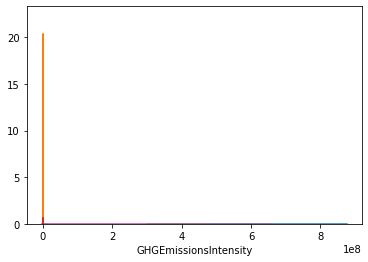

In [53]:
for column in data.select_dtypes(['int32','float64']):
    sns.distplot(data[column], bins=30)

### Suppression des outliers

In [54]:
data.shape

(6716, 48)

In [55]:
from sklearn.neighbors import KDTree

for column in data.select_dtypes(include = ['int32','float64']).columns.tolist() :
    "outliers aux extrémités des distributions"
    data.loc[data[column] > data[column].quantile(0.995)] = np.nan
    data.loc[data[column] < data[column].quantile(0.005)] = np.nan
print(data.shape)
    
#outliers éloignés par rapport à leurs voisins
numeric_data = data.select_dtypes(['int32', 'float64']).copy().dropna()
print(numeric_data.shape)
kdt = KDTree(numeric_data, leaf_size = 40, metric='minkowski')

dist, ind = kdt.query(numeric_data, k=3, return_distance=True)
numeric_data['3N_distance'] = np.sum(dist, axis=1)    
numeric_data = numeric_data[numeric_data['3N_distance'] < numeric_data['3N_distance'].quantile(0.99)]
index_to_drop = numeric_data.index.tolist()

data = data.drop(index_to_drop, axis=0)
    

(6716, 48)
(219, 29)


Correction du nombre de bâtiments (ne peut être nul)

In [56]:
data[data['NumberofBuildings'] == 0]['NumberofBuildings'] = 1

C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
data.isna().sum().sum()

87693

In [58]:
data.shape

(6284, 48)

## NaN

In [59]:
data.shape

(6284, 48)

In [60]:
data_nan = data.isna().sum().sort_values(ascending=False).head(15)

In [61]:
data_nan

Comment                            6273
Outlier                            6234
YearsENERGYSTARCertified           6158
ThirdLargestPropertyUseTypeGFA     5622
ThirdLargestPropertyUseType        5622
SecondLargestPropertyUseType       3882
SecondLargestPropertyUseTypeGFA    3882
OtherFuelUse(kBtu)                 3664
SPD Beats                          3655
DefaultData                        3606
ENERGYSTARScore                    2206
LargestPropertyUseTypeGFA          1105
LargestPropertyUseType             1105
ListOfAllPropertyUseTypes          1091
ComplianceStatus                   1076
dtype: int64

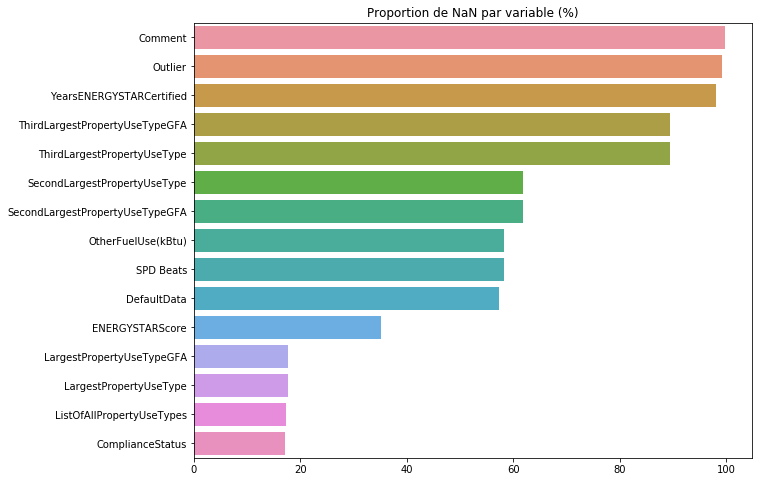

In [62]:
plt.figure(figsize=(10,8))
plt.title('Proportion de NaN par variable (%)')
sns.barplot(x=data_nan.values/data.shape[0]*100, y=data_nan.index)

In [63]:
for colonne in data.columns:
    print('\n',colonne)
    print('Qté Nan : ', round(data[colonne].isna().sum()/data[colonne].shape[0]*100), '%')
    print('Uniques : ', data[colonne].nunique())


 OSEBuildingID
Qté Nan :  16.0 %
Uniques :  2938

 DataYear
Qté Nan :  16.0 %
Uniques :  2

 BuildingType
Qté Nan :  16.0 %
Uniques :  8

 PrimaryPropertyType
Qté Nan :  16.0 %
Uniques :  29

 PropertyName
Qté Nan :  16.0 %
Uniques :  5157

 TaxParcelIdentificationNumber
Qté Nan :  16.0 %
Uniques :  3128

 CouncilDistrictCode
Qté Nan :  16.0 %
Uniques :  7

 Neighborhood
Qté Nan :  16.0 %
Uniques :  13

 YearBuilt
Qté Nan :  16.0 %
Uniques :  113

 NumberofBuildings
Qté Nan :  16.0 %
Uniques :  6

 NumberofFloors
Qté Nan :  16.0 %
Uniques :  31

 PropertyGFATotal
Qté Nan :  16.0 %
Uniques :  2817

 PropertyGFAParking
Qté Nan :  16.0 %
Uniques :  756

 PropertyGFABuilding(s)
Qté Nan :  16.0 %
Uniques :  3150

 ListOfAllPropertyUseTypes
Qté Nan :  17.0 %
Uniques :  371

 LargestPropertyUseType
Qté Nan :  18.0 %
Uniques :  52

 LargestPropertyUseTypeGFA
Qté Nan :  18.0 %
Uniques :  2813

 SecondLargestPropertyUseType
Qté Nan :  62.0 %
Uniques :  50

 SecondLargestPropertyUseTypeGFA
Qté N

In [64]:
data.drop(['Comment', 'Outlier'],axis=1).dropna().shape

(0, 46)

In [65]:
data.shape

(6284, 48)

In [66]:
((data.isna().sum()/data.shape[0]) < .99)

OSEBuildingID                      True 
DataYear                           True 
BuildingType                       True 
PrimaryPropertyType                True 
PropertyName                       True 
TaxParcelIdentificationNumber      True 
CouncilDistrictCode                True 
Neighborhood                       True 
YearBuilt                          True 
NumberofBuildings                  True 
NumberofFloors                     True 
PropertyGFATotal                   True 
PropertyGFAParking                 True 
PropertyGFABuilding(s)             True 
ListOfAllPropertyUseTypes          True 
LargestPropertyUseType             True 
LargestPropertyUseTypeGFA          True 
SecondLargestPropertyUseType       True 
SecondLargestPropertyUseTypeGFA    True 
ThirdLargestPropertyUseType        True 
ThirdLargestPropertyUseTypeGFA     True 
YearsENERGYSTARCertified           True 
ENERGYSTARScore                    True 
SiteEUI(kBtu/sf)                   True 
SiteEUIWN(kBtu/s

In [67]:
liste_colonnes = []
serie_nan = data.isna().sum()/data.shape[0] < .9
for colonne, booleen in zip(serie_nan.index, serie_nan.values):
    if booleen :
        liste_colonnes.append(colonne)
data = data[liste_colonnes]

In [68]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'DefaultData',
       'ComplianceStatus', 'SPD Beats', 'Address', 'City', 'State', 'ZipCode',
       'Latitude', 'Longitude', 'TotalGHGEmissions',

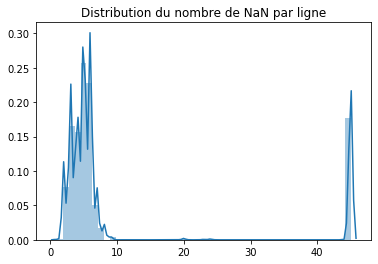

In [69]:

plt.title('Distribution du nombre de NaN par ligne')
sns.distplot(data.isna().sum(axis=1))

In [70]:
data[[
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'OtherFuelUse(kBtu)',]].isna().sum()

SiteEUI(kBtu/sf)         992 
SiteEUIWN(kBtu/sf)       992 
SourceEUI(kBtu/sf)       996 
SourceEUIWN(kBtu/sf)     996 
SiteEnergyUse(kBtu)      992 
SiteEnergyUseWN(kBtu)    992 
SteamUse(kBtu)           996 
Electricity(kWh)         996 
Electricity(kBtu)        996 
NaturalGas(therms)       996 
NaturalGas(kBtu)         996 
OtherFuelUse(kBtu)       3664
dtype: int64

In [71]:
data.isna().sum().sort_values(ascending=False)

ThirdLargestPropertyUseType        5622
ThirdLargestPropertyUseTypeGFA     5622
SecondLargestPropertyUseType       3882
SecondLargestPropertyUseTypeGFA    3882
OtherFuelUse(kBtu)                 3664
SPD Beats                          3655
DefaultData                        3606
ENERGYSTARScore                    2206
LargestPropertyUseType             1105
LargestPropertyUseTypeGFA          1105
ListOfAllPropertyUseTypes          1091
ComplianceStatus                   1076
Electricity(kWh)                   996 
SourceEUIWN(kBtu/sf)               996 
SteamUse(kBtu)                     996 
GHGEmissionsIntensity              996 
Electricity(kBtu)                  996 
NaturalGas(therms)                 996 
NaturalGas(kBtu)                   996 
TotalGHGEmissions                  996 
SourceEUI(kBtu/sf)                 996 
SiteEUI(kBtu/sf)                   992 
SiteEUIWN(kBtu/sf)                 992 
SiteEnergyUseWN(kBtu)              992 
SiteEnergyUse(kBtu)                992 


In [72]:
data.select_dtypes(['object']).nunique().sort_values()

City                             1   
State                            1   
DefaultData                      2   
PrimaryPropertyType              29  
ThirdLargestPropertyUseType      36  
SecondLargestPropertyUseType     50  
LargestPropertyUseType           52  
ListOfAllPropertyUseTypes        371 
TaxParcelIdentificationNumber    3128
Address                          5060
PropertyName                     5157
dtype: int64

### Complétion des NaN par des valeurs quand applicable

Quand NaN pour usage ou other fuel use : valeur 0

In [73]:
data[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'OtherFuelUse(kBtu)']] = data[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'OtherFuelUse(kBtu)']].fillna(0, )

Quand NaN pour le type d'usage suppléentaire : création d'un nouveau type "no use"

In [74]:
data[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']] = data[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']].fillna('No Use')

In [75]:
data['LargestPropertyUseType'] = data['LargestPropertyUseType'].fillna('No information')

In [76]:
data[data['LargestPropertyUseType'] == 'No information']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No information,NaN,No Use,0.0,No Use,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No information,NaN,No Use,0.0,No Use,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No information,NaN,No Use,0.0,No Use,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No information,NaN,No Use,0.0,No Use,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No information,NaN,No Use,0.0,No Use,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No information,NaN,No Use,0.0,No Use,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No information,NaN,No Use,0.0,No Use,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No information,NaN,No Use,0.0,No Use,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No information,NaN,No Use,0.0,No Use,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data.isna().sum().sort_values()

ThirdLargestPropertyUseTypeGFA     0   
ThirdLargestPropertyUseType        0   
SecondLargestPropertyUseTypeGFA    0   
SecondLargestPropertyUseType       0   
LargestPropertyUseType             0   
OtherFuelUse(kBtu)                 0   
OSEBuildingID                      978 
Address                            978 
City                               978 
State                              978 
Latitude                           978 
Longitude                          978 
PropertyGFABuilding(s)             978 
PropertyGFATotal                   978 
YearBuilt                          978 
Neighborhood                       978 
CouncilDistrictCode                978 
PropertyName                       978 
PrimaryPropertyType                978 
BuildingType                       978 
DataYear                           978 
PropertyGFAParking                 978 
TaxParcelIdentificationNumber      979 
NumberofFloors                     981 
NumberofBuildings                  986 


In [78]:
data.shape

(6284, 45)

In [79]:
data.dropna(how = 'all', axis=0, inplace=True)

In [80]:
data.shape

(6284, 45)

In [81]:
data.isna().sum().sort_values()

ThirdLargestPropertyUseTypeGFA     0   
ThirdLargestPropertyUseType        0   
SecondLargestPropertyUseTypeGFA    0   
SecondLargestPropertyUseType       0   
LargestPropertyUseType             0   
OtherFuelUse(kBtu)                 0   
OSEBuildingID                      978 
Address                            978 
City                               978 
State                              978 
Latitude                           978 
Longitude                          978 
PropertyGFABuilding(s)             978 
PropertyGFATotal                   978 
YearBuilt                          978 
Neighborhood                       978 
CouncilDistrictCode                978 
PropertyName                       978 
PrimaryPropertyType                978 
BuildingType                       978 
DataYear                           978 
PropertyGFAParking                 978 
TaxParcelIdentificationNumber      979 
NumberofFloors                     981 
NumberofBuildings                  986 


### Suite NaN

In [82]:
data.shape

(6284, 45)

On va retirer les indices pour lesquelles ont a beaucoup de NaN sur une même ligne, notamment pour les features qui ont le plus de NaN

In [83]:
data.drop(['DefaultData', 'SPD Beats', 'ENERGYSTARScore'], axis=1)[data.drop(['DefaultData', 'SPD Beats', 'ENERGYSTARScore'],axis=1).isna().any(axis=1)].shape

(1217, 42)

In [84]:
index_to_drop = data.drop(['DefaultData', 'SPD Beats', 'ENERGYSTARScore'], axis=1)[data.drop(['DefaultData', 'SPD Beats', 'ENERGYSTARScore'],axis=1).isna().any(axis=1)].index

In [85]:
data.drop(index_to_drop, axis=0, inplace=True)

In [86]:
data.shape

(4196, 45)

## Regroupement des données catégorielles

In [87]:
data.select_dtypes(['object', 'category']).nunique().sort_values(ascending=False)

PropertyName                     4094
Address                          4034
TaxParcelIdentificationNumber    2750
ListOfAllPropertyUseTypes        339 
SecondLargestPropertyUseType     49  
LargestPropertyUseType           49  
ThirdLargestPropertyUseType      37  
PrimaryPropertyType              27  
Neighborhood                     13  
BuildingType                     8   
CouncilDistrictCode              7   
ComplianceStatus                 2   
DataYear                         2   
State                            1   
City                             1   
DefaultData                      1   
dtype: int64

In [88]:
property_use_types_columns = ['SecondLargestPropertyUseType',
                         'LargestPropertyUseType',
                         'ThirdLargestPropertyUseType',
                         'PrimaryPropertyType']

In [89]:
usetype_dict = {'Retail Store' : 'Retail',
                'Supermarket/Grocery Store' : 'Retail',
                'Repair Services (Vehicle, Shoe, Locksmith, etc)' : 'Retail',
                'Automobile Dealership': 'Retail',
                'Convenience Store without Gas Station': 'Retail',
                'Personal Services': 'Retail',
                'Enclosed Mall': 'Retail',
                'Strip Mall': 'Retail',
                'Wholesale Club/Supercenter': 'Retail',
                'Other - Mall': 'Retail',
                'Supermarket / Grocery Stor': 'Retail',
                
                'Food Sales': 'Leisure',
                'Restaurant' : 'Leisure',
                'Other - Restaurant/Bar' : 'Leisure',
                'Food Service': 'Leisure' ,
                'Worship Facility': 'Leisure',
                'Other - Recreation': 'Leisure',
                'Other - Entertainment/Public Assembly': 'Leisure',
                'Performing Arts': 'Leisure',
                'Bar/Nightclub': 'Leisure',
                'Movie Theater': 'Leisure',
                'Museum': 'Leisure',
                'Social/Meeting Hall': 'Leisure',
                'Fitness Center/Health Club/Gym': 'Leisure',
                'Lifestyle Center ': 'Leisure',
                'Fast Food Restaurant': 'Leisure',
                
                'Multifamily Housing' : 'Hotel/Senior Care/Housing',
                'Other - Lodging/Residential': 'Hotel/Senior Care/Housing',
                'Residence Hall/Dormitory': 'Hotel/Senior Care/Housing',
                'Hotel' : 'Hotel/Senior Care/Housing',
                'Senior Care Community' : 'Hotel/Senior Care/Housing',
                'Residential Care Facility' : 'Hotel/Senior Care/Housing',
                'High-Rise Multifamily': 'Hotel/Senior Care/Housing',
                
                'Medical Office' : 'Health',
                
                'Other - Services' : 'Office',
                'Bank Branch' : 'Office',
                'Financial Office' : 'Office',
                'Other - Public Services': 'Office',

                'K-12 School' : 'Education',
                'Other - Education': 'Education',
                'Vocational School' : 'Education', 
                'Adult Education' : 'Education',
                'Pre-school/Daycare': 'Education',
                'University': 'Education',
                'College/University': 'Education',
                'Library': 'Education'
               }

In [90]:
for column in property_use_types_columns:
    data[column] = data[column].replace(usetype_dict)

In [91]:
for column in data[property_use_types_columns].columns:
    print(data[column].value_counts())
    print('\n')

No Use                                                  2233
Parking                                                 1123
Office                                                  292 
Retail                                                  224 
Leisure                                                 104 
Other                                                   73  
Non-Refrigerated Warehouse                              44  
Hotel/Senior Care/Housing                               25  
Education                                               16  
Swimming Pool                                           15  
Health                                                  15  
Distribution Center                                     8   
Data Center                                             7   
Self-Storage Facility                                   5   
Manufacturing/Industrial Plant                          3   
Laboratory                                              2   
Other/Specialty Hospital

## Vue du jeu de données nettoyé

In [92]:
data.shape

(4196, 45)

In [93]:
data.sample(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
2730,26743.0,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Lakeside West,4143000000,3,EAST,1961.0,1.0,6.0,80539.0,0.0,80539.0,Multifamily Housing,Hotel/Senior Care/Housing,66307.0,No Use,0.0,No Use,0.0,22.0,102.199997,112.800003,148.800003,159.899994,6779778.000,7.481662e+06,0.0,3.855466e+05,1315485.0,54642.925780,5464293.0,0.0,False,Compliant,NaN,2040 43rd Avenue e,Seattle,WA,98112.0,47.638280,-122.276350,299.38,3.72
3326,50047.0,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Odin,2767703631,6,BALLARD,2014.0,2.0,7.0,318835.0,0.0,318835.0,"Multifamily Housing, Parking",Hotel/Senior Care/Housing,236227.0,Parking,82608.0,No Use,0.0,100.0,30.400000,31.100000,73.300003,75.599998,7180055.000,7.355683e+06,0.0,1.370294e+06,4675443.0,25046.109380,2504611.0,0.0,False,Compliant,NaN,5402 20th Ave. NW,Seattle,WA,98116.0,47.667860,-122.381120,165.61,0.52
125,205.0,2015,SPS-District K-12,Education,BALLARD HIGH (SPS-DISTRICT),3050700050,6,BALLARD,1999.0,1.0,2.0,242795.0,0.0,242795.0,K-12 School,Education,242795.0,No Use,0.0,No Use,0.0,82.0,36.000000,40.000000,102.000000,111.400000,8728584.000,9.715644e+06,0.0,2.188272e+06,7466694.0,12622.000000,1262200.0,0.0,NaN,Compliant,23.0,1418 NW 65TH ST,Seattle,WA,98117.0,47.676787,-122.373968,119.09,0.36
2554,26075.0,2016,Multifamily LR (1-4),Low-Rise Multifamily,Olive Terrace Apartments,6848700020,3,EAST,1955.0,1.0,3.0,28094.0,0.0,28094.0,Multifamily Housing,Hotel/Senior Care/Housing,28094.0,No Use,0.0,No Use,0.0,63.0,32.900002,35.400002,103.400002,111.199997,924963.875,9.946942e+05,0.0,2.710914e+05,924964.0,0.000000,0.0,0.0,False,Compliant,NaN,1811 Summit Ave E.,Seattle,WA,98122.0,47.618000,-122.325580,6.45,0.23
2461,25716.0,2016,Multifamily LR (1-4),Low-Rise Multifamily,Bellevue Place Apts,8725600075,3,EAST,1963.0,1.0,4.0,23150.0,0.0,23150.0,"Multifamily Housing, Parking",Hotel/Senior Care/Housing,18100.0,Parking,2796.0,No Use,0.0,86.0,32.500000,34.200001,93.099998,98.099998,588492.500,6.188367e+05,0.0,1.495804e+05,510368.0,781.239990,78124.0,0.0,False,Compliant,NaN,1717 Bellevue Ave.,Seattle,WA,98104.0,47.617690,-122.327010,7.71,0.33
3179,49719.0,2016,Multifamily LR (1-4),Low-Rise Multifamily,SEVEN HILLS APTS (ID49719),1794501135,7,MAGNOLIA / QUEEN ANNE,2012.0,1.0,4.0,74964.0,0.0,74964.0,"Multifamily Housing, Parking",Hotel/Senior Care/Housing,45700.0,Parking,24942.0,No Use,0.0,83.0,49.799999,49.799999,92.599998,92.599998,2277238.250,2.277238e+06,0.0,2.583579e+05,881517.0,13957.210940,1395721.0,0.0,False,Compliant,NaN,1919 QUEEN ANNE AVE N,Seattle,WA,98109.0,47.636620,-122.357380,80.27,1.07
2172,24602.0,2015,Nonresidential COS,Other,SOUTHWEST PRECINCT (SEATTLE POLICE),7985400296,1,DELRIDGE,2002.0,1.0,2.0,28531.0,0.0,28531.0,"Other, Parking",Other,28303.0,Parking,1100.0,No Use,0.0,NaN,122.600000,128.300000,279.300000,276.800000,3468606.000,3.630737e+06,0.0,5.976550e+05,2039283.0,14294.000000,1429408.0,0.0,NaN,Compliant,13.0,2300 SW WEBSTER ST,Seattle,WA,98106.0,47.535882,-122.361815,90.13,2.85
1595,22550.0,2015,Multifamily LR (1-4),Low-Rise Multifamily,GOLFCREST APARTMENTS,2770604035,7,MAGNOLIA / QUEEN ANNE,1963.0,1.0,4.0,28674.0,0.0,28674.0,Multifamily Housing,Hotel/Senior Care/Housing,28674.0,No Use,0.0,No Use,0.0,89

In [94]:
data.shape

(4196, 45)

In [95]:
data.isna().sum()

OSEBuildingID                      0   
DataYear                           0   
BuildingType                       0   
PrimaryPropertyType                0   
PropertyName                       0   
TaxParcelIdentificationNumber      0   
CouncilDistrictCode                0   
Neighborhood                       0   
YearBuilt                          0   
NumberofBuildings                  0   
NumberofFloors                     0   
PropertyGFATotal                   0   
PropertyGFAParking                 0   
PropertyGFABuilding(s)             0   
ListOfAllPropertyUseTypes          0   
LargestPropertyUseType             0   
LargestPropertyUseTypeGFA          0   
SecondLargestPropertyUseType       0   
SecondLargestPropertyUseTypeGFA    0   
ThirdLargestPropertyUseType        0   
ThirdLargestPropertyUseTypeGFA     0   
ENERGYSTARScore                    987 
SiteEUI(kBtu/sf)                   0   
SiteEUIWN(kBtu/sf)                 0   
SourceEUI(kBtu/sf)                 0   


## Feature engineering

### Idées:

* Supprimer les features qui n'apportent pas d'information utilisables pour le modèle (identifiant, texte, numero de rue, etc.)
* retirer données redondantes ou qui n'ont pas de rapport avec la problématique (certaines émissions? energy star score)
* voir quelles sont les données qu'il faut prédire : plusieurs données de consommation : faire le tri
* Feature résidentiel / non résidentiel
* observer distribution des variables : quelles informations (normalité, passage au log, skewness, etc.)


### Identification des colonnes inutiles

Colonnes n'apportant pas d'information : ville, état, nom de la propriété, identifiant, année des données, données de la police (SPD Beats), etc.

In [96]:
data[['LargestPropertyUseTypeGFA', 'LargestPropertyUseType']].head()

,LargestPropertyUseTypeGFA,LargestPropertyUseType
0,88434.0,Hotel/Senior Care/Housing
5,88830.0,Police Station
6,81352.0,Hotel/Senior Care/Housing
7,102761.0,Leisure
8,163984.0,Hotel/Senior Care/Housing


In [97]:
columns_to_drop = ['OSEBuildingID', #non utilisé
                   'City', #1 unique valeur
                   'State', #1 unique valeur
                   'PropertyName', #similaire à ID
                   'TaxParcelIdentificationNumber', #similaire à ID
                   'ListOfAllPropertyUseTypes', #donnée figurant dans d'autres colonnes
                   #'DataYear', 
                   'SPD Beats', #données police / trop d'infos manquantes
                   'ComplianceStatus', #infos sur la compétude des données à supprimer
                   'DefaultData', #utilité de la variable inconnue
                   'Address' #non conservé (latitude et longitude préférées)
                   'ZipCode' # non conservé (latitude et longitude préférées)
                  ] 

In [98]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
0,1.0,2015,NonResidential,Hotel/Senior Care/Housing,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927.0,1.0,12.0,88434.0,0.0,88434.0,Hotel,Hotel/Senior Care/Housing,88434.0,No Use,0.0,No Use,0.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,False,Compliant,31.0,405 OLIVE WAY,Seattle,WA,98101.0,47.612190,-122.337997,249.43,2.64
5,9.0,2015,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),660000560,7,DOWNTOWN,1999.0,1.0,2.0,97288.0,37198.0,60090.0,Police Station,Police Station,88830.0,No Use,0.0,No Use,0.0,NaN,135.7,146.9,313.5,321.6,12051984.0,13045258.0,0.0,2130921.0,7271004.0,47813.0,4781283.0,0.0,NaN,Compliant,7.0,810 VIRGINIA ST,Seattle,WA,98101.0,47.616439,-122.336764,304.62,2.81
6,10.0,2015,NonResidential,Hotel/Senior Care/Housing,CAMLIN WORLDMARK HOTEL,660000825,7,DOWNTOWN,1926.0,1.0,11.0,83008.0,0.0,83008.0,Hotel,Hotel/Senior Care/Housing,81352.0,No Use,0.0,No Use,0.0,25.0,76.9,79.6,149.5,158.2,6252842.0,6477493.0,0.0,785342.0,2679698.0,35733.0,3573255.0,0.0,NaN,Compliant,31.0,1619 9TH AVE,Seattle,WA,98101.0,47.614114,-122.332741,208.46,2.37
7,11.0,2015,NonResidential,Other,PARAMOUNT THEATER,660000955,7,DOWNTOWN,1926.0,1.0,8.0,102761.0,0.0,102761.0,Other - Entertainment/Public Assembly,Leisure,102761.0,No Use,0.0,No Use,0.0,NaN,62.5,71.8,152.2,160.4,6426022.0,7380086.0,2003108.0,1203937.0,4108004.0,3151.0,315079.0,0.0,NaN,Compliant,31.0,901 PINE ST,Seattle,WA,98101.0,47.612902,-122.331309,199.99,1.77
8,12.0,2015,NonResidential,Hotel/Senior Care/Housing,COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE,939000080,7,DOWNTOWN,1904.0,1.0,15.0,163984.0,0.0,163984.0,Hotel,Hotel/Senior Care/Housing,163984.0,No Use,0.0,No Use,0.0,46.0,77.0,82.9,174.6,186.8,12633744.0,13589025.0,0.0,2155728.0,7355649.0,52784.0,5278400.0,0.0,NaN,Compliant,19.0,612 2ND AVE,Seattle,WA,98104.0,47.602589,-122.332553,331.61,1.83


### Quelles grandeur conserver pour la prédiction?

**Liste des différentes colonnes énergétiques:**
* SiteEUI(kBtu/sf) - Site Energy Use Intensity (EUI) is a property's Site Energy Use 
* SiteEUIWN(kBtu/sf) - Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area
* SourceEUI(kBtu/sf) - Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area 
* SourceEUIWN(kBtu/sf) - Weather Normalized (WN) Site Energy Use Intensity (EUI)
* SiteEnergyUse(kBtu) - The annual amount of energy consumed by the property from all sources of energy.
* **SiteEnergyUseWN(kBtu)** - The annual amount of energy consumed by the property from all sources of energy, adjusted to what the property would have consumed during 30-year average weather conditions.
* SteamUse(kBtu) - The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).
* Electricity(kWh) - The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh
* Electricity(kBtu) - The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).
* NaturalGas(therms) - The annual amount of utility-supplied natural gas consumed by the property, measured in therms
* NaturalGas(kBtu) - The annual amount of utility-supplied natural gas consumed by the property, measured in thousands of British thermal units (kBtu).
* OtherFuelUse(kBtu) - 

**Liste des différentes colonnes pour les émissions**
* **TotalGHGEmissions**
* GHGEmissionsIntensity

**Attention :** il y a une incohérence entre le titre du projet et la consigne : le titre parle de consommation électrique quand la consigne parle de consommation totale.


Il y a beaucoup de valeurs, qui comptent des grandeurs différentes, dans des unités différentes.
Que conserver / transformer / supprimer?
* on peut supprimer les valeurs surfaciques



In [99]:
columns_to_drop += ['SiteEUI(kBtu/sf)',
                        'SiteEUIWN(kBtu/sf)',
                        'SourceEUI(kBtu/sf)',
                        'SourceEUIWN(kBtu/sf)',
                        'SiteEnergyUse(kBtu)',
                        'SteamUse(kBtu)',
                        'Electricity(kWh)',
                        'Electricity(kBtu)',
                        'NaturalGas(therms)',
                        'NaturalGas(kBtu)',
                        'OtherFuelUse(kBtu)',
                        'GHGEmissionsIntensity'
                   ]

### Vérification des id

Avons nous des bâtiments communs aux 2 années

In [100]:
data['OSEBuildingID'].value_counts().head()

26119.0    2
24489.0    2
23949.0    2
27103.0    2
20071.0    2
Name: OSEBuildingID, dtype: int64

In [101]:
data.groupby("OSEBuildingID").filter(lambda x: len(x) > 1).sort_values(by='OSEBuildingID').tail(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
3321,50038.0,2016,NonResidential,Mixed Use Property,Salmon Bay Marine Center West,2771605298,7,MAGNOLIA / QUEEN ANNE,2014.0,1.0,2.0,25532.0,0.0,25532.0,"Office, Repair Services (Vehicle, Shoe, Locksmith, etc)",Office,11745.0,Retail,11745.0,No Use,0.0,NaN,26.700001,28.500000,83.900002,89.599998,6.278541e+05,6.702910e+05,0.0,184013.5000,627854.0,0.000000,0.0,0.0,False,Compliant,NaN,2360 W Commodore Way,Seattle,WA,98199.0,47.661440,-122.387230,4.38,0.17
3334,50038.0,2015,NonResidential,Mixed Use Property,Salmon Bay Marine Center West,2771605298,7,MAGNOLIA / QUEEN ANNE,2014.0,1.0,2.0,25532.0,0.0,25532.0,"Office, Repair Services (Vehicle, Shoe, Locksmith, etc)",Office,11745.0,Retail,11745.0,No Use,0.0,84.0,26.800000,29.100000,84.000000,91.300000,6.286090e+05,6.826750e+05,0.0,184235.0000,628635.0,0.000000,0.0,0.0,NaN,Compliant,27.0,2360 W COMMODORE WAY,Seattle,WA,98199.0,47.661999,-122.386757,4.38,0.07
3327,50049.0,2016,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM (ID50049),6599950000,2,DOWNTOWN,2000.0,1.0,4.0,44650.0,0.0,44650.0,Multifamily Housing,Hotel/Senior Care/Housing,44650.0,No Use,0.0,No Use,0.0,58.0,28.000000,29.200001,87.800003,91.800003,1.248599e+06,1.305528e+06,0.0,365943.4063,1248599.0,0.000000,0.0,0.0,False,Compliant,NaN,321 10TH AVE S,Seattle,WA,98104.0,47.599800,-122.320340,8.70,0.19
3335,50049.0,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,2,DOWNTOWN,2000.0,1.0,4.0,44650.0,0.0,44650.0,Multifamily Housing,Hotel/Senior Care/Housing,44650.0,No Use,0.0,No Use,0.0,71.0,25.600000,27.800000,80.400000,87.200000,1.142949e+06,1.240429e+06,0.0,334979.0000,1142996.0,0.000000,0.0,0.0,NaN,Compliant,16.0,321 10TH AVE S,Seattle,WA,98104.0,47.599503,-122.320343,7.97,0.07
3330,50055.0,2016,Multifamily MR (5-9),Mid-Rise Multifamily,129610 - Identity Seattle Building D,1142001670,4,NORTHEAST,2014.0,2.0,7.0,42393.0,0.0,42393.0,Multifamily Housing,Hotel/Senior Care/Housing,31748.0,No Use,0.0,No Use,0.0,96.0,51.200001,54.700001,132.100006,142.100006,1.625696e+06,1.736628e+06,0.0,348601.0000,1189427.0,4362.689941,436269.0,0.0,False,Compliant,NaN,4123 12th Ave NE,Seattle,WA,98105.0,47.657560,-122.315840,31.46,0.74
3336,50055.0,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,4,NORTHEAST,2014.0,1.0,7.0,42393.0,0.0,42393.0,Multifamily Housing,Hotel/Senior Care/Housing,31748.0,No Use,0.0,No Use,0.0,98.0,48.600000,55.100000,124.200000,144.700000,1.543282e+06,1.750143e+06,0.0,325705.0000,1111352.0,4320.000000,431976.0,0.0,NaN,Compliant,38.0,4123 12TH AVE NE,Seattle,WA,98105.0,47.657525,-122.316016,30.69,0.61
3334,50058.0,2016,Multifamily LR (1-4),Low-Rise Multifamily,Wedgewood Estates Building A,6392001040,4,NORTHEAST,1981.0,1.0,3.0,48230.0,0.0,48230.0,"Multifamily Housing, Parking",Hotel/Senior Care/Housing,26175.0,Parking,16425.0,No Use,0.0,80.0,29.900000,31.600000,94.000000,99.400002,7.833457e+05,8.283887e+05,0.0,229585.5000,783346.0,0.000000,0.0,0.0,False,Compliant,NaN,3801 NE 77th St,Seattle,WA,98115.0,47.684370,-122.287060,5.46,0.11
3338,50058.0,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,6392001040,4,NORTHEAST,1981.0,1.0,3.0,48230.0,0.0,4823

Les données semblent assez similaires d'une année sur l'autre.

Calculons l'écart de consommation énergétique entre les 2 années pour chaque entrée.

In [102]:
spread = data.groupby("OSEBuildingID").filter(lambda x: len(x) > 1).sort_values(by='OSEBuildingID').groupby('OSEBuildingID')['SiteEnergyUseWN(kBtu)'].agg(['max','min'])#.diff(axis=1)['min'].dropna()

In [103]:
spread['min'] = np.true_divide(spread['min'], spread['max'])
spread['max'] = np.true_divide(spread['max'], spread['max'])
spread = spread.diff(axis=1)
spread = spread.multiply(100)
spread = spread.dropna(axis=1)
spread = spread.abs()

In [104]:
spread.head()

,min
OSEBuildingID,
1.0,4.819302
9.0,3.553368
10.0,6.402562
11.0,4.230364
12.0,4.262552


Text(0.5, 0, 'Ecart de consommation 2015/2016 (en %)')

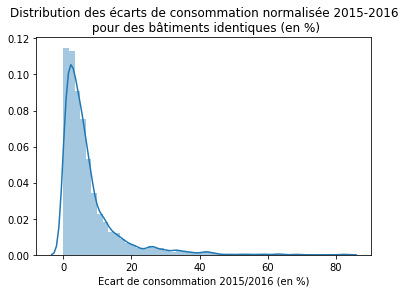

In [105]:
plt.title('Distribution des écarts de consommation normalisée 2015-2016\n pour des bâtiments identiques (en %)')
sns.distplot(spread)
plt.xlabel('Ecart de consommation 2015/2016 (en %)')

In [106]:
print(round(spread.shape[0]*2 / data.shape[0] * 100,0), '% du jeu de données est constitué de bâtiments \ndont on a des informations pour 2015 et 2016')

74.0 % du jeu de données est constitué de bâtiments 
dont on a des informations pour 2015 et 2016


In [107]:
spread.describe().T[['mean', 'min', 'max', '50%', 'std']]

,mean,min,max,50%,std
min,7.249601,0.010359,82.461129,4.699891,8.577006


Ce résultat est intéressant:
* la moyenne d'écart de consommation normalisée est de 7,2 %
* le minimum d'écart est négligeable
* le maximum d'écart est de 82 % (!)
* la médiane est à 4,7 % 
* la déviation standard est à 8,5 %

Regardons de plus près les données dont le maximum d'écart est supérieur à la moyenne + 3 x la déviation standard

In [108]:
id_high_spread = spread[spread['min']>(7.24 + 3*8.57)].reset_index()['OSEBuildingID'].values

In [109]:
data[data['OSEBuildingID'].isin(id_high_spread)].sort_values(by='OSEBuildingID')

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
145,234.0,2015,Nonresidential COS,Non-Refrigerated Warehouse,SEATTLE CITY LIGHT ROY STREET WAREHOUSE,4088803530,7,MAGNOLIA / QUEEN ANNE,1926.0,1.0,2.0,50292.0,0.0,50292.0,"Non-Refrigerated Warehouse, Office, Other - Services, Residence Hall/Dormitory",Non-Refrigerated Warehouse,42345.0,Hotel/Senior Care/Housing,5000.0,Office,4730.000000,NaN,13.300000,13.300000,41.600000,41.600000,7.154460e+05,7.154460e+05,0.0000,2.096850e+05,715475.0,0.000000,0.0,0.0,NaN,Compliant,7.0,800 ALOHA ST,Seattle,WA,98109.0,47.626517,-122.340841,4.99,0.04
146,234.0,2016,Nonresidential COS,Warehouse,SCL Roy Street Warehouse,4088803530,7,MAGNOLIA / QUEEN ANNE,1926.0,1.0,2.0,50292.0,0.0,50292.0,"Non-Refrigerated Warehouse, Office, Other - Services, Residence Hall/Dormitory",Non-Refrigerated Warehouse,42345.0,Hotel/Senior Care/Housing,5000.0,Office,4730.000000,NaN,8.000000,8.000000,25.100000,25.100000,4.304737e+05,4.304737e+05,0.0000,1.261646e+05,430474.0,0.000000,0.0,0.0,False,Compliant,NaN,802 Roy St,Seattle,WA,98109.0,47.625910,-122.340840,3.00,0.06
198,318.0,2015,NonResidential,Other,PIER 54 IVARS ACRES OF CLAMS,7666202495,7,DOWNTOWN,1900.0,1.0,1.0,62900.0,0.0,62900.0,"Other, Restaurant, Retail Store",Other,42695.0,Leisure,20525.0,Retail,3031.000000,NaN,96.100000,96.100000,187.800000,187.800000,6.366808e+06,6.366808e+06,0.0000,8.075380e+05,2755434.0,36115.000000,3611488.0,0.0,NaN,Compliant,19.0,1003 ALASKAN WAY,Seattle,WA,98104.0,47.604119,-122.339602,211.01,3.17
198,318.0,2016,NonResidential,Mixed Use Property,Pier 54,7666202495,7,DOWNTOWN,1900.0,1.0,1.0,62900.0,0.0,62900.0,"Other, Restaurant, Retail Store",Leisure,32494.0,Other,29793.0,Retail,3384.300049,NaN,158.300003,165.699997,286.700012,294.600006,1.039433e+07,1.088387e+07,0.0000,1.110180e+06,3787933.0,66063.968750,6606397.0,0.0,False,Compliant,NaN,1001 Alaskan Way,Seattle,WA,98104.0,47.604100,-122.339580,377.27,6.00
391,545.0,2015,NonResidential,Distribution Center,GLACIER NORTHWEST,5367204505,2,GREATER DUWAMISH,1969.0,1.0,1.0,57540.0,0.0,57540.0,Distribution Center,Distribution Center,57540.0,No Use,0.0,No Use,0.000000,29.0,32.700000,32.700000,89.200000,89.200000,1.878979e+06,1.878979e+06,0.0000,4.427130e+05,1510598.0,3684.000000,368443.0,0.0,NaN,Compliant,36.0,6335 1ST AVE S,Seattle,WA,98134.0,47.546214,-122.334819,30.10,0.41
389,545.0,2016,NonResidential,Distribution Center,GLACIER NORTHWEST (6335 1st Ave S),5367204505,2,GREATER DUWAMISH,1969.0,1.0,1.0,57540.0,0.0,57540.0,Distribution Center,Distribution Center,57540.0,No Use,0.0,No Use,0.000000,26.0,44.900002,48.799999,94.699997,98.900002,2.582687e+06,2.808275e+06,0.0000,3.842265e+05,1310981.0,12717.059570,1271706.0,0.0,False,Compliant,NaN,6335 1st Ave S,Seattle,WA,98108.0,47.546210,-122.334860,76.68,1.33
425,580.0,2015,NonResidential,Large Office,PEMCO,3025049001,7,MAGNOLIA / QUEEN ANNE,1986.0,1.0,5.0,154029.0,62380.0,91649.0,"Office, Parking",Office,91645.0,Parking,66288.0,No Use,0.000000,NaN,20.600000,20.600000,47.500000,47.500000,1.886382e+06,1.886382e+06,0.0000,3.325210e+05,1134608.0,7518.000000,751821.0,0.0,NaN,Compliant,7.0,1300 DEXTER AVE N,Seattle,WA,98109.0,47.631082,-122.341911,47.84,0.28
421,580.0,2016,NonResidential,Large Office,PEMCO,3025049001,7,M

Pour une minorité, on constate un changement d'usage qui peut expliquer cette variation des consommations.
Pour les autres, on n'explique pas une telle variation en observant le jeu de données.
Pour simplifier on va donc supprimer lse valeurs extrêmes.

In [110]:
data = data[~data['OSEBuildingID'].isin(id_high_spread)]

In [111]:
data.shape

(4116, 45)

### Suppression des colonnes non utilisées

In [112]:
data.shape

(4116, 45)

In [113]:
print(columns_to_drop)

['OSEBuildingID', 'City', 'State', 'PropertyName', 'TaxParcelIdentificationNumber', 'ListOfAllPropertyUseTypes', 'SPD Beats', 'ComplianceStatus', 'DefaultData', 'AddressZipCode', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'GHGEmissionsIntensity']


In [114]:
for column in columns_to_drop:
    try:
        data.drop(column, axis=1, inplace=True)
    except:
        print('colonne {} absente du jeu de donnée'.format(column))

colonne AddressZipCode absente du jeu de donnée


In [115]:
data.head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),Address,ZipCode,Latitude,Longitude,TotalGHGEmissions
0,2015,NonResidential,Hotel/Senior Care/Housing,7,DOWNTOWN,1927.0,1.0,12.0,88434.0,0.0,88434.0,Hotel/Senior Care/Housing,88434.0,No Use,0.0,No Use,0.0,65.0,7097539.0,405 OLIVE WAY,98101.0,47.612190,-122.337997,249.43
5,2015,Nonresidential COS,Other,7,DOWNTOWN,1999.0,1.0,2.0,97288.0,37198.0,60090.0,Police Station,88830.0,No Use,0.0,No Use,0.0,NaN,13045258.0,810 VIRGINIA ST,98101.0,47.616439,-122.336764,304.62
6,2015,NonResidential,Hotel/Senior Care/Housing,7,DOWNTOWN,1926.0,1.0,11.0,83008.0,0.0,83008.0,Hotel/Senior Care/Housing,81352.0,No Use,0.0,No Use,0.0,25.0,6477493.0,1619 9TH AVE,98101.0,47.614114,-122.332741,208.46
7,2015,NonResidential,Other,7,DOWNTOWN,1926.0,1.0,8.0,102761.0,0.0,102761.0,Leisure,102761.0,No Use,0.0,No Use,0.0,NaN,7380086.0,901 PINE ST,98101.0,47.612902,-122.331309,199.99
8,2015,NonResidential,Hotel/Senior Care/Housing,7,DOWNTOWN,1904.0,1.0,15.0,163984.0,0.0,163984.0,Hotel/Senior Care/Housing,163984.0,No Use,0.0,No Use,0.0,46.0,13589025.0,612 2ND AVE,98104.0,47.602589,-122.332553,331.61


In [116]:
data.shape

(4116, 24)

### ENERGYSTARScore

# Exploration

## Analyse univariée

### Distribution des données

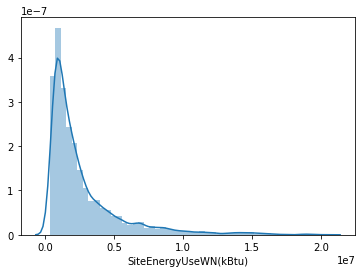

In [117]:

sns.distplot(data['SiteEnergyUseWN(kBtu)'].dropna())

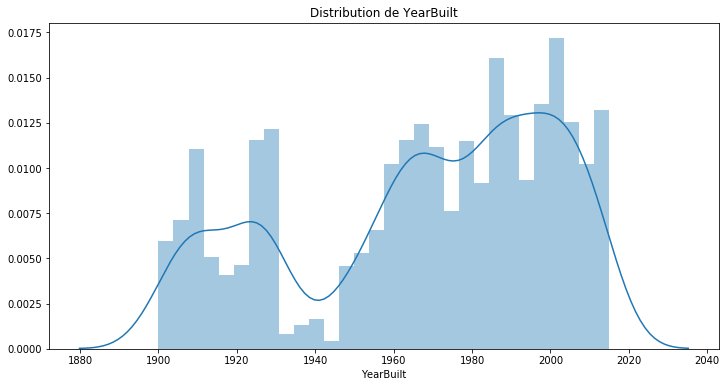

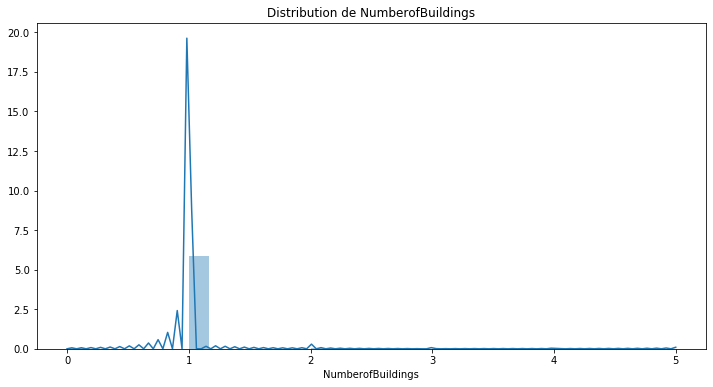

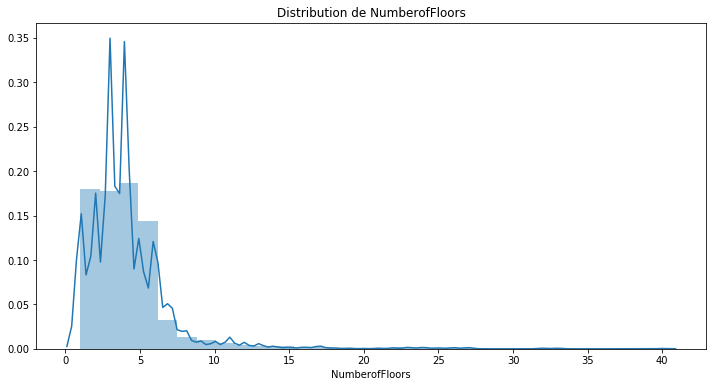

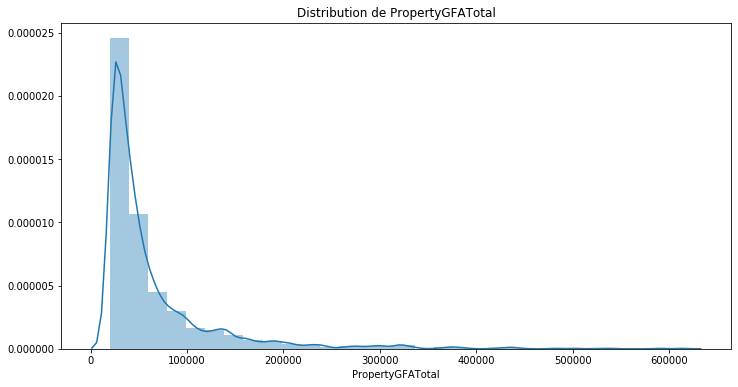

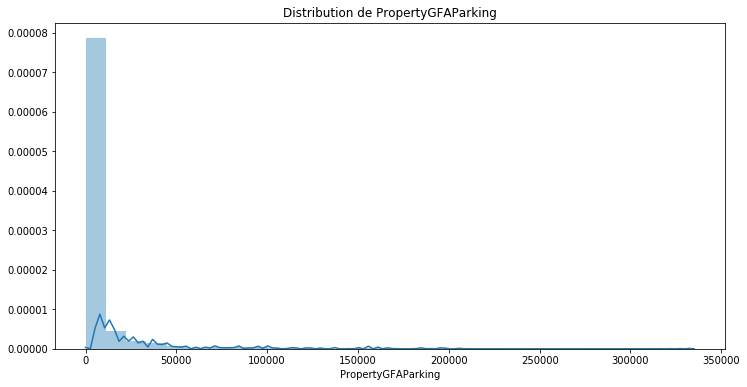

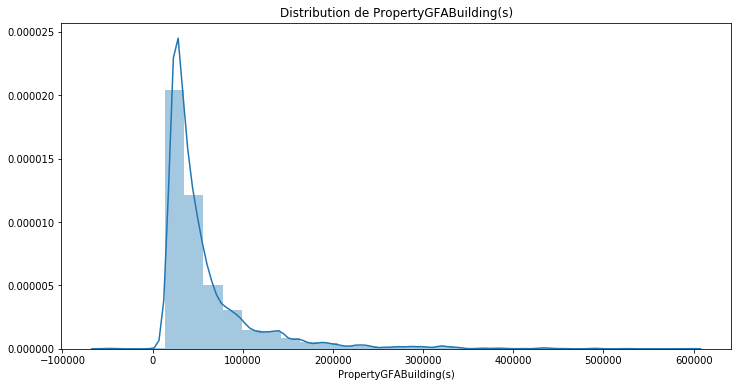

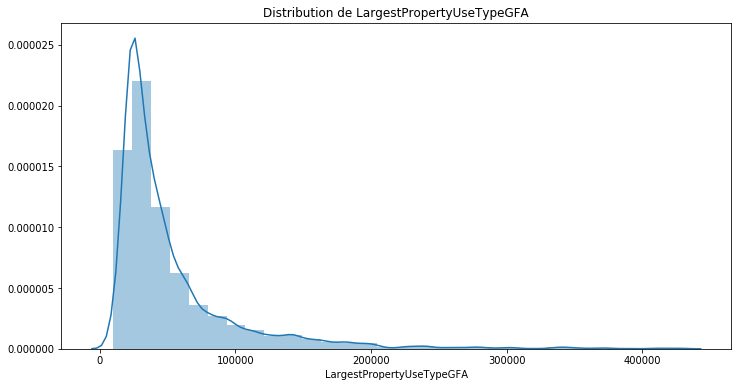

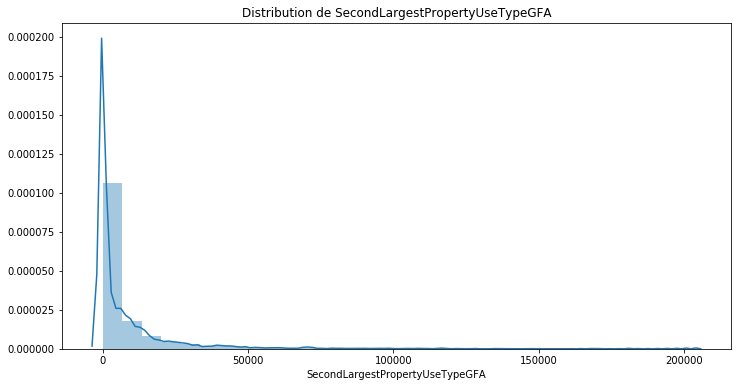

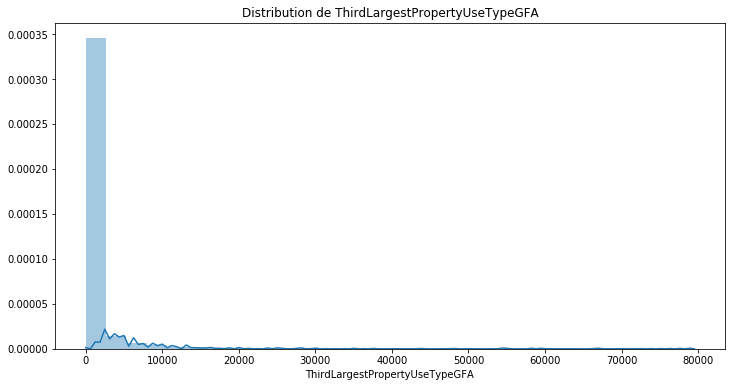

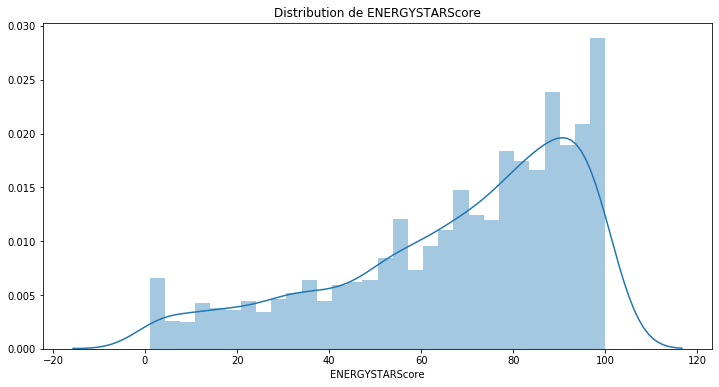

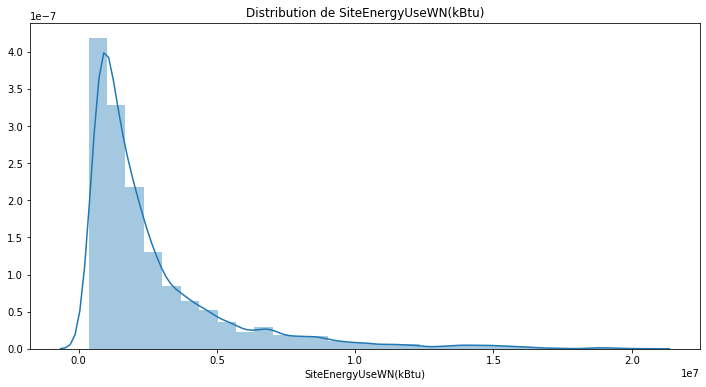

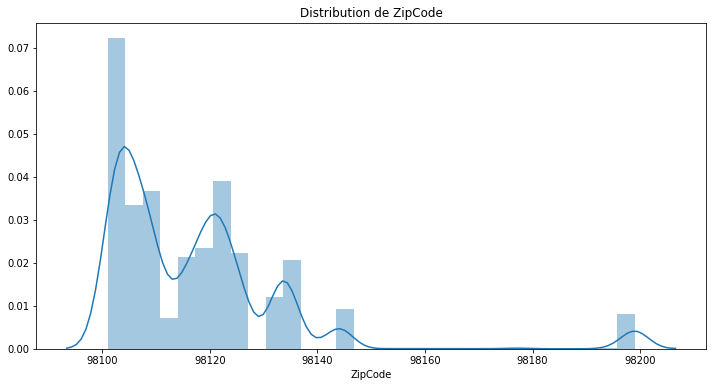

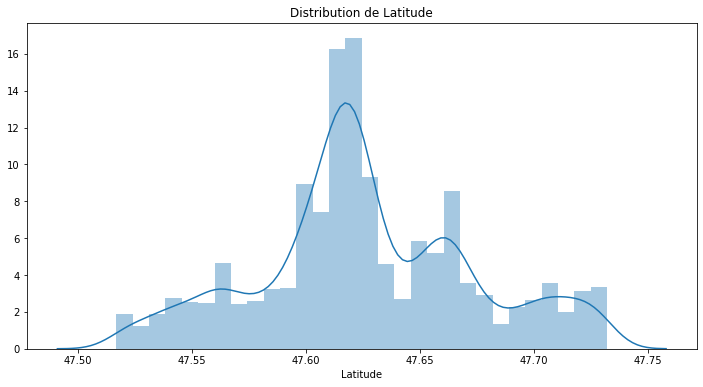

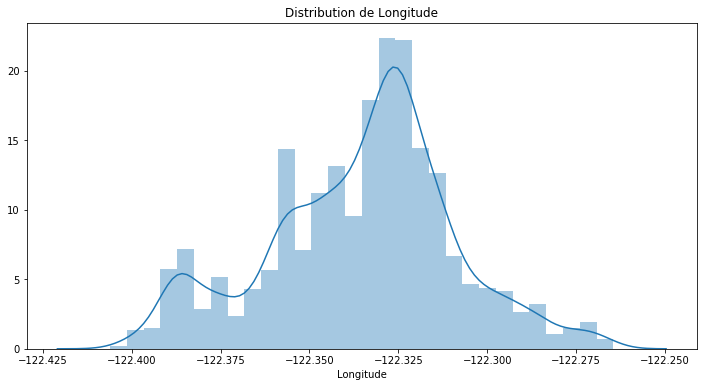

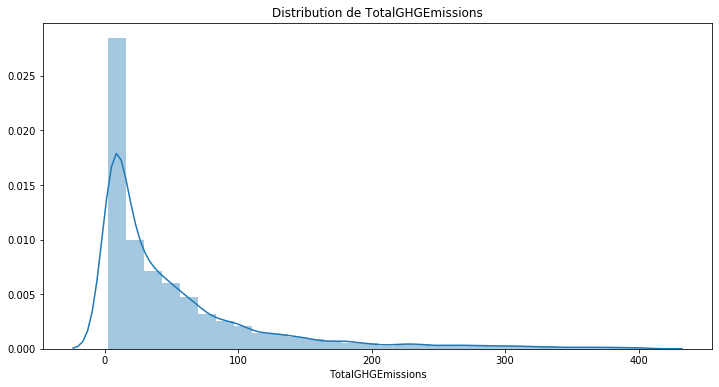

In [118]:
for column in data.select_dtypes(['int32', 'float64']).columns:
    plt.figure(figsize=(12,6))
    plt.title('Distribution de ' + column)
    sns.distplot(data[column].dropna(), bins=30)

### Boîtes à moustaches

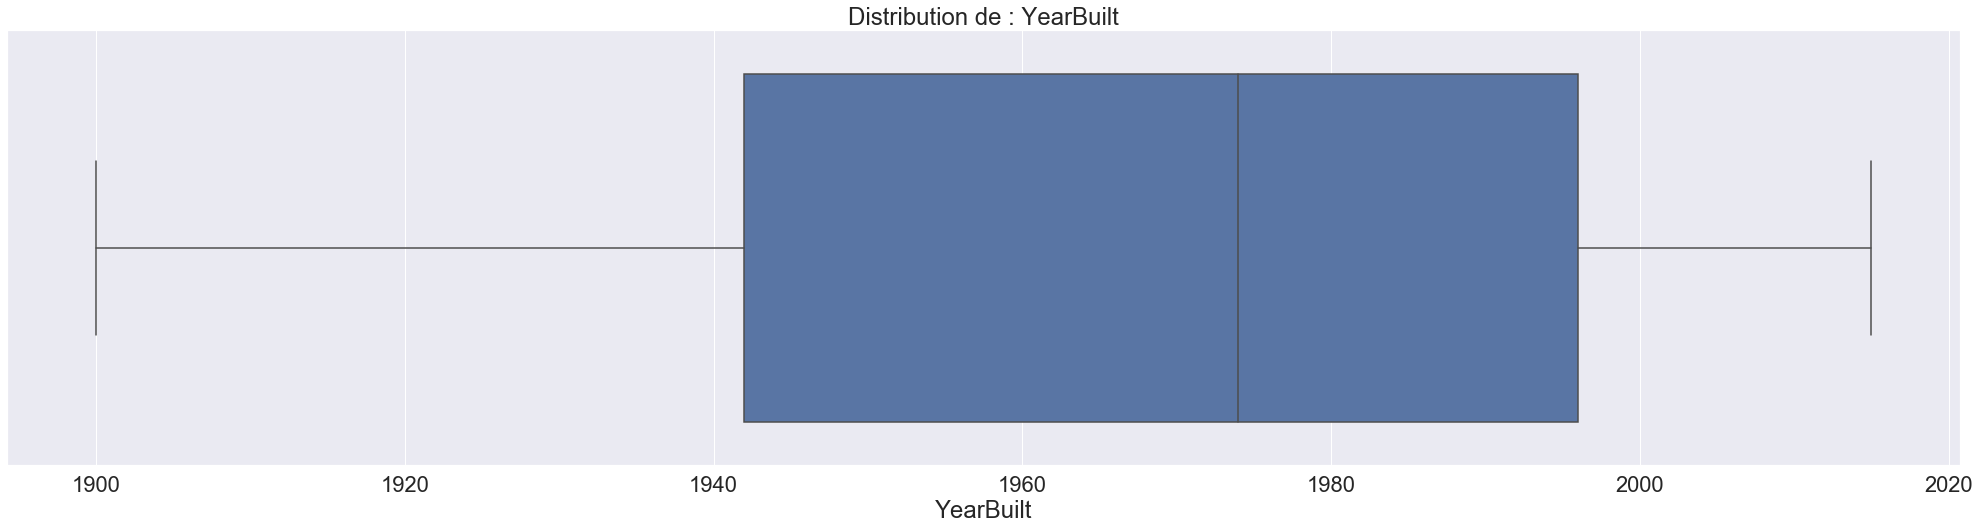

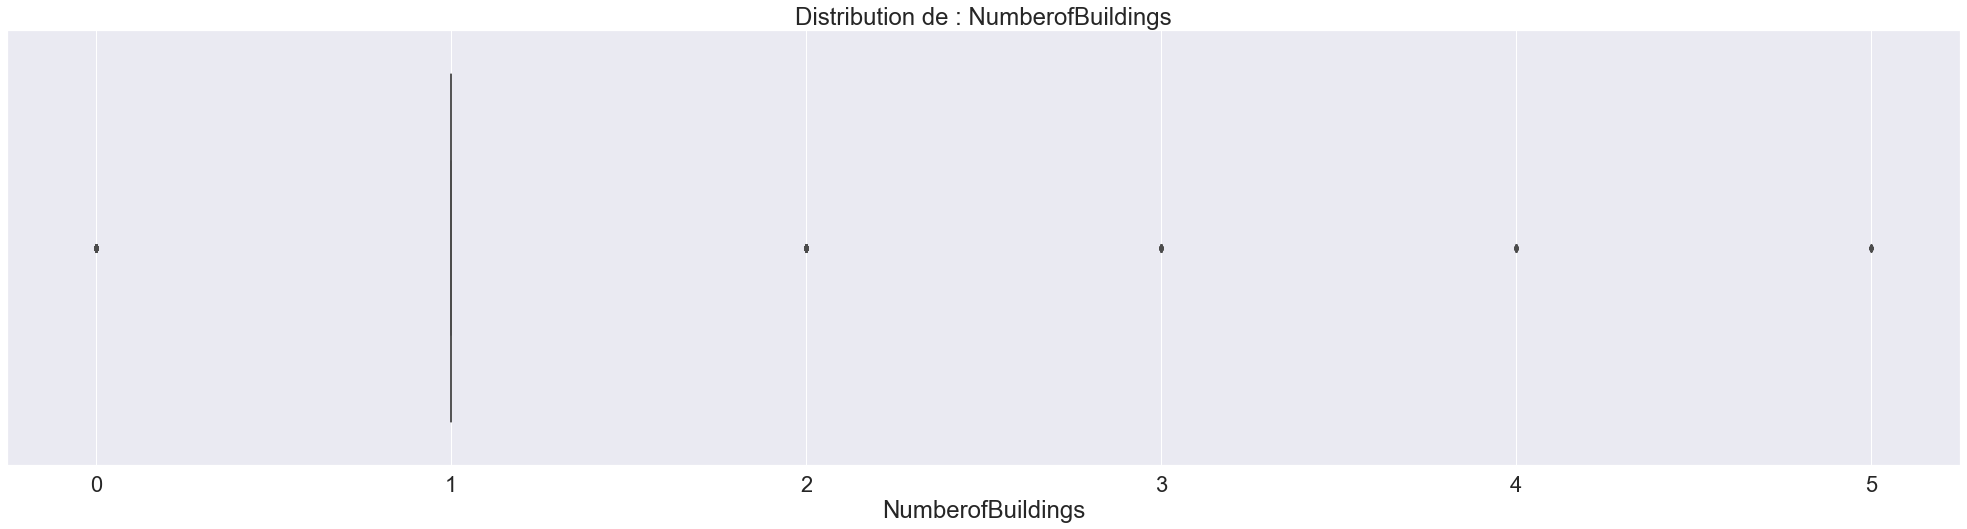

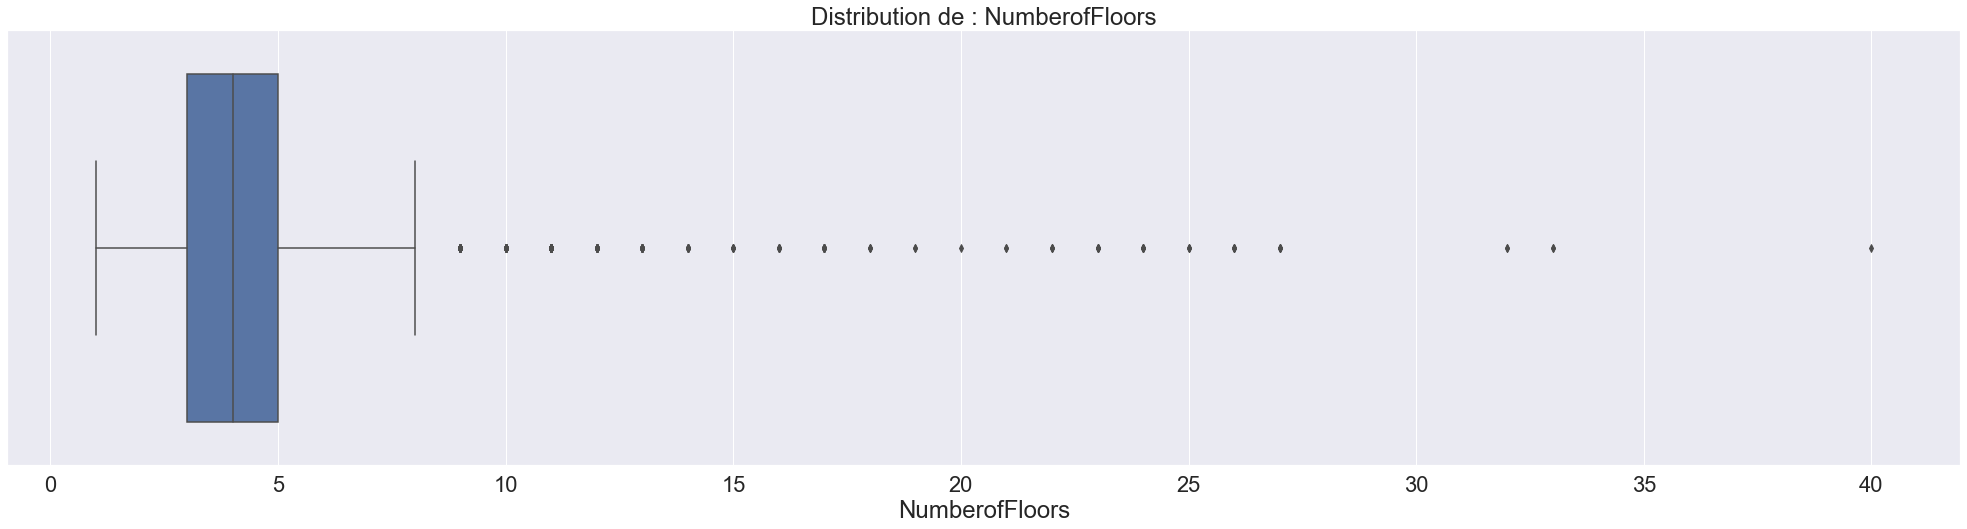

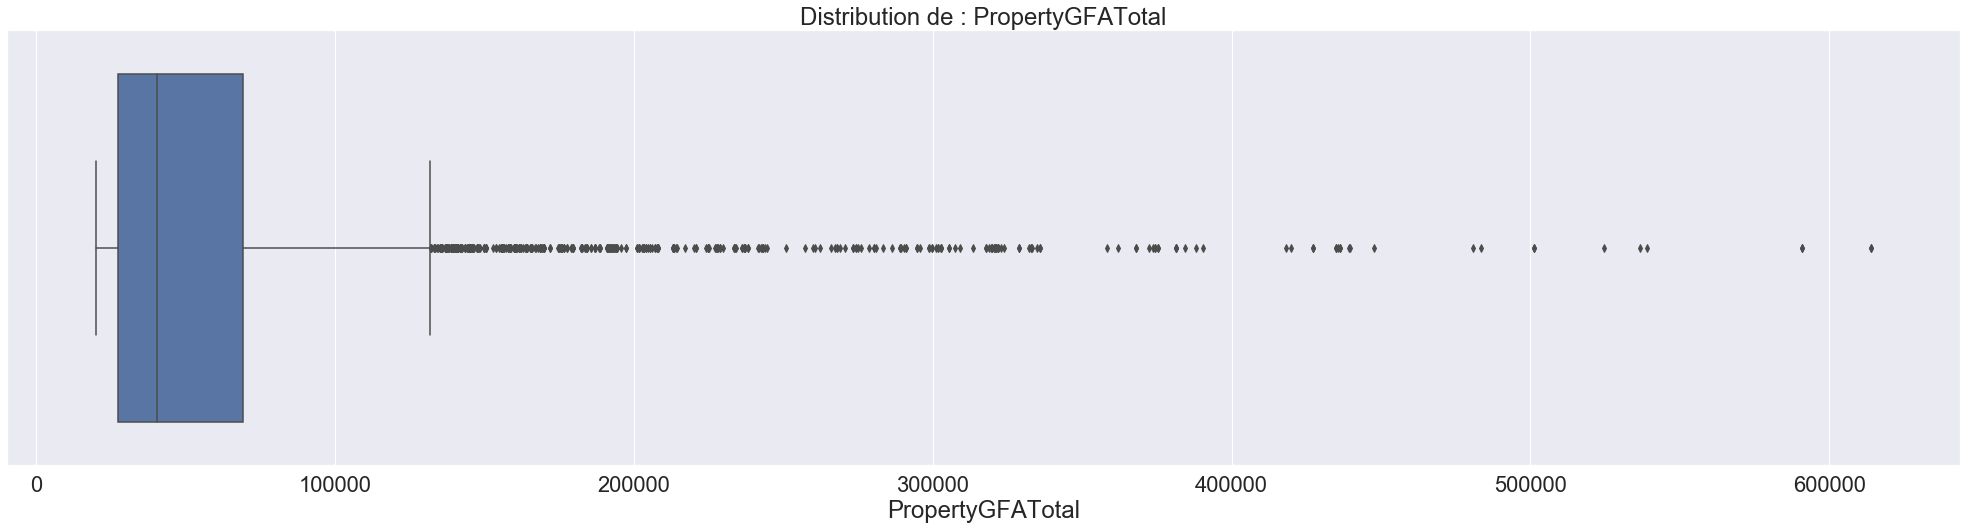

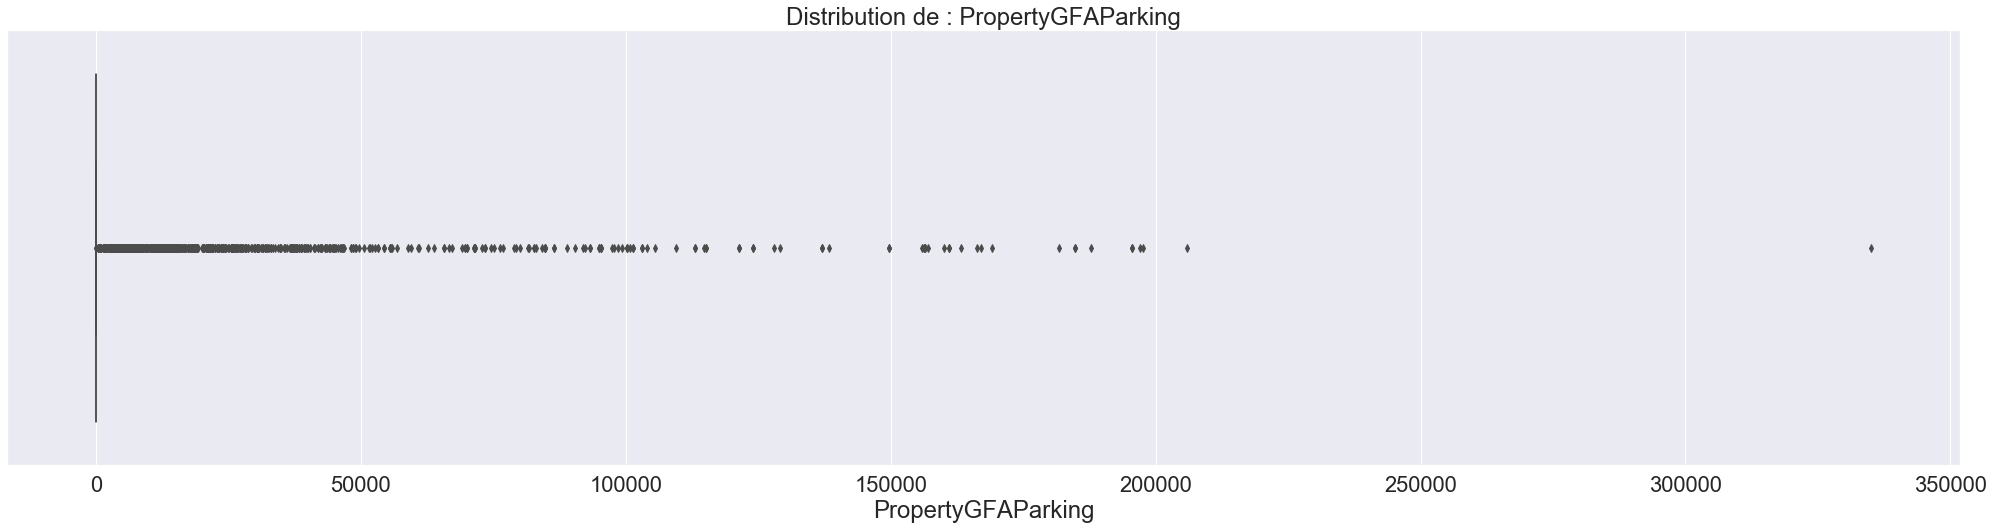

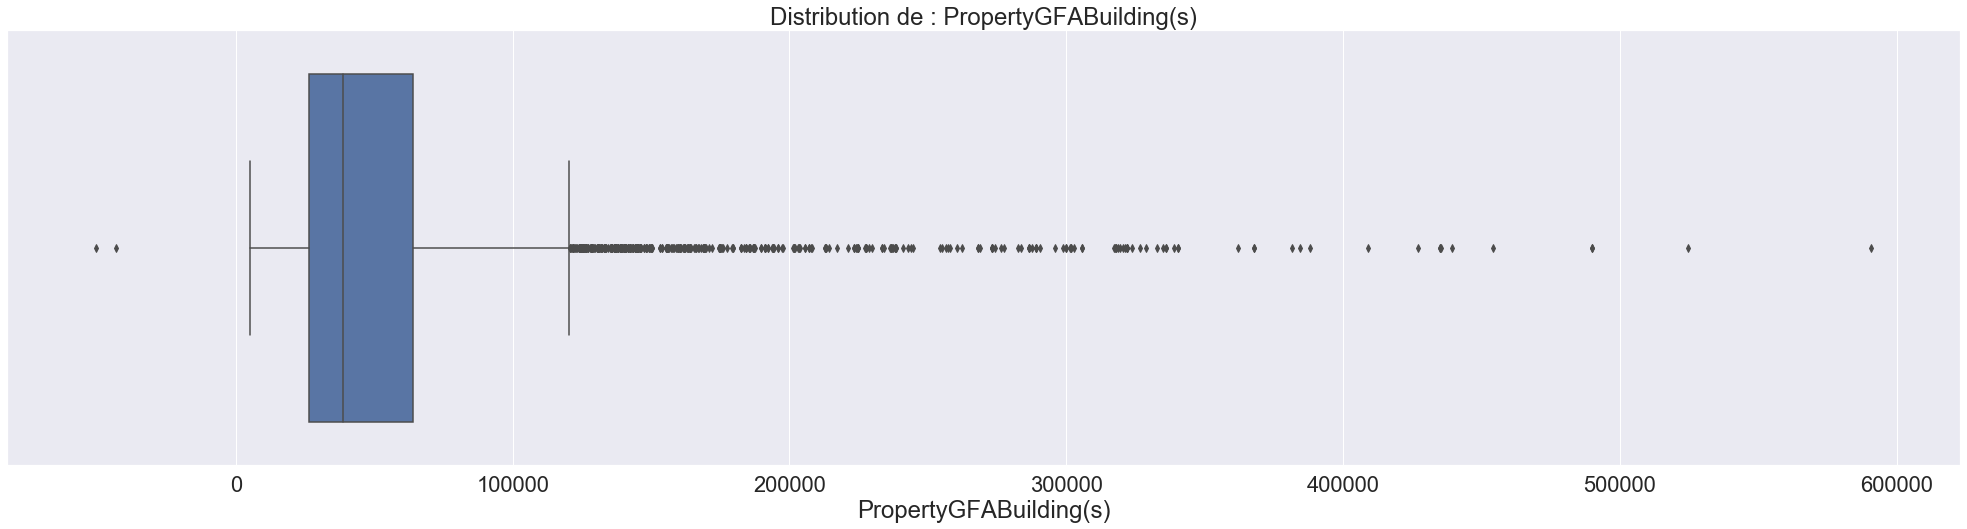

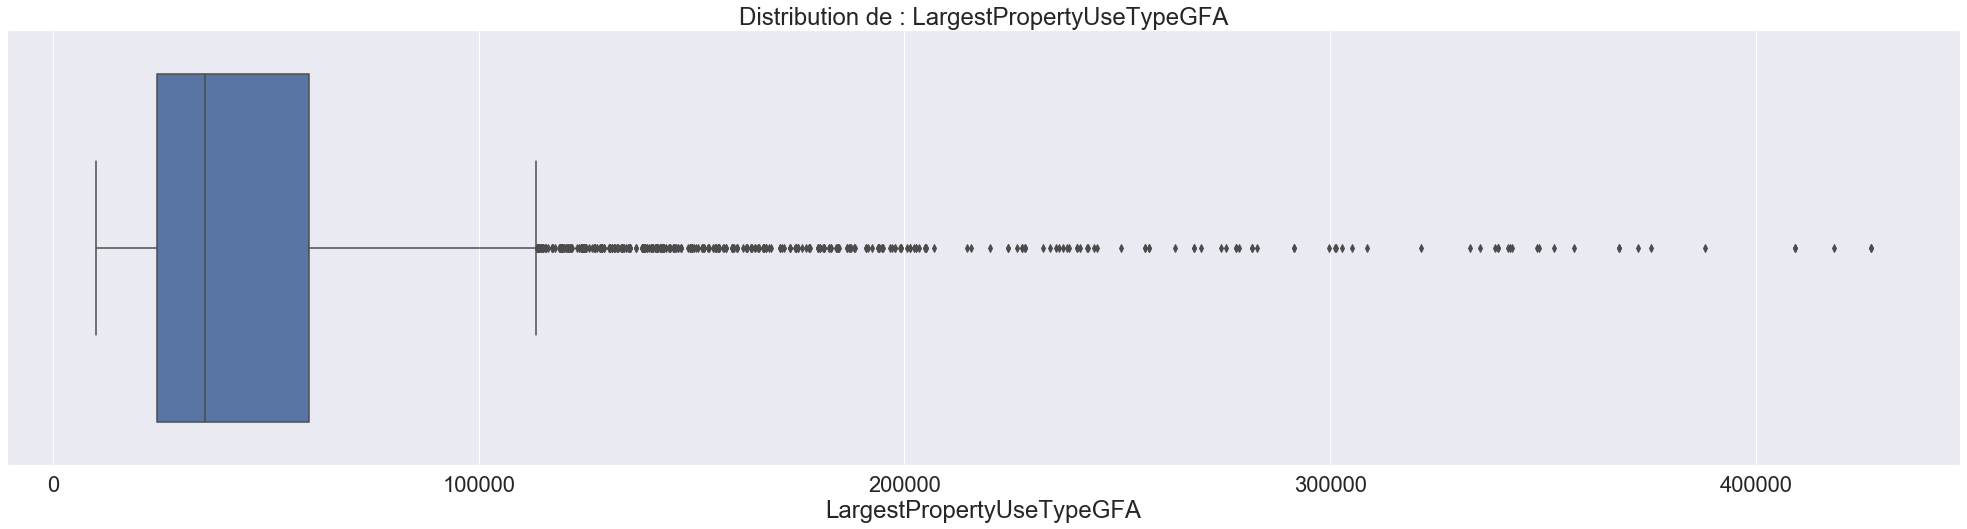

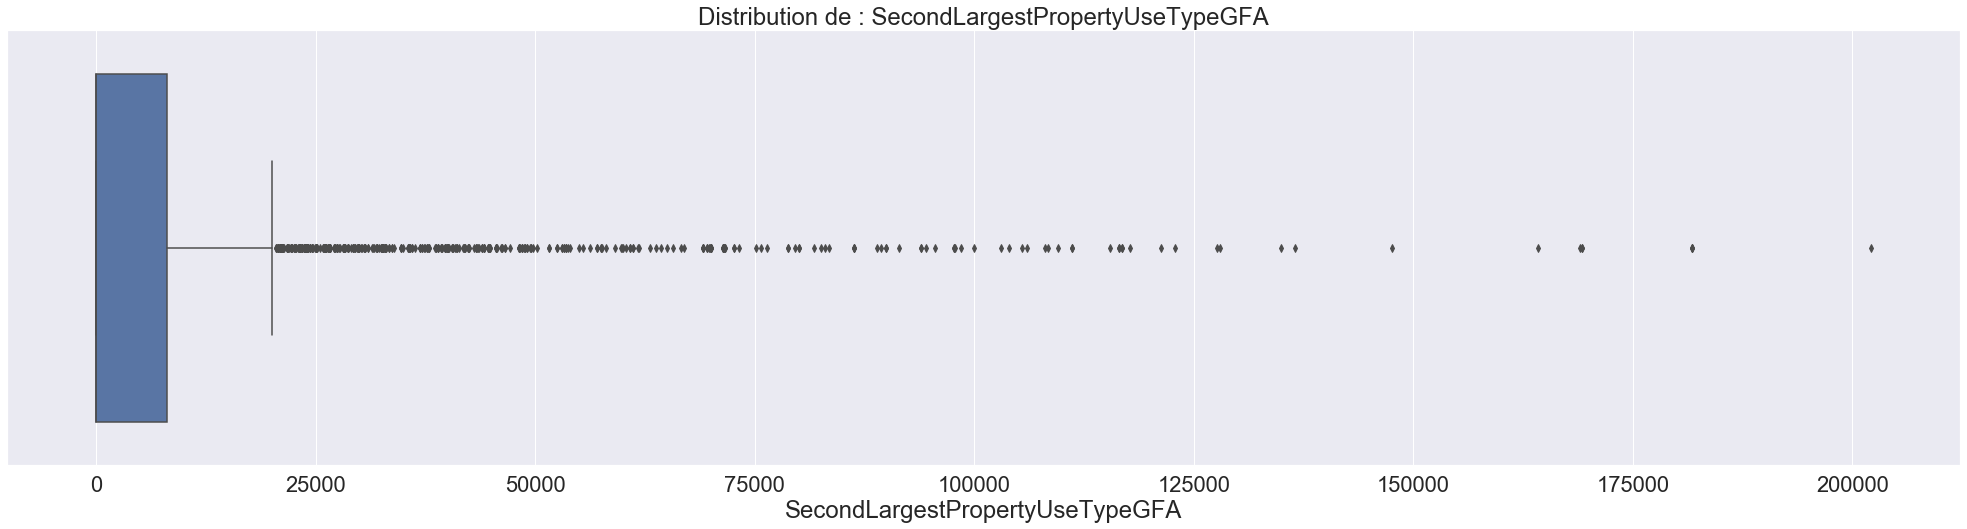

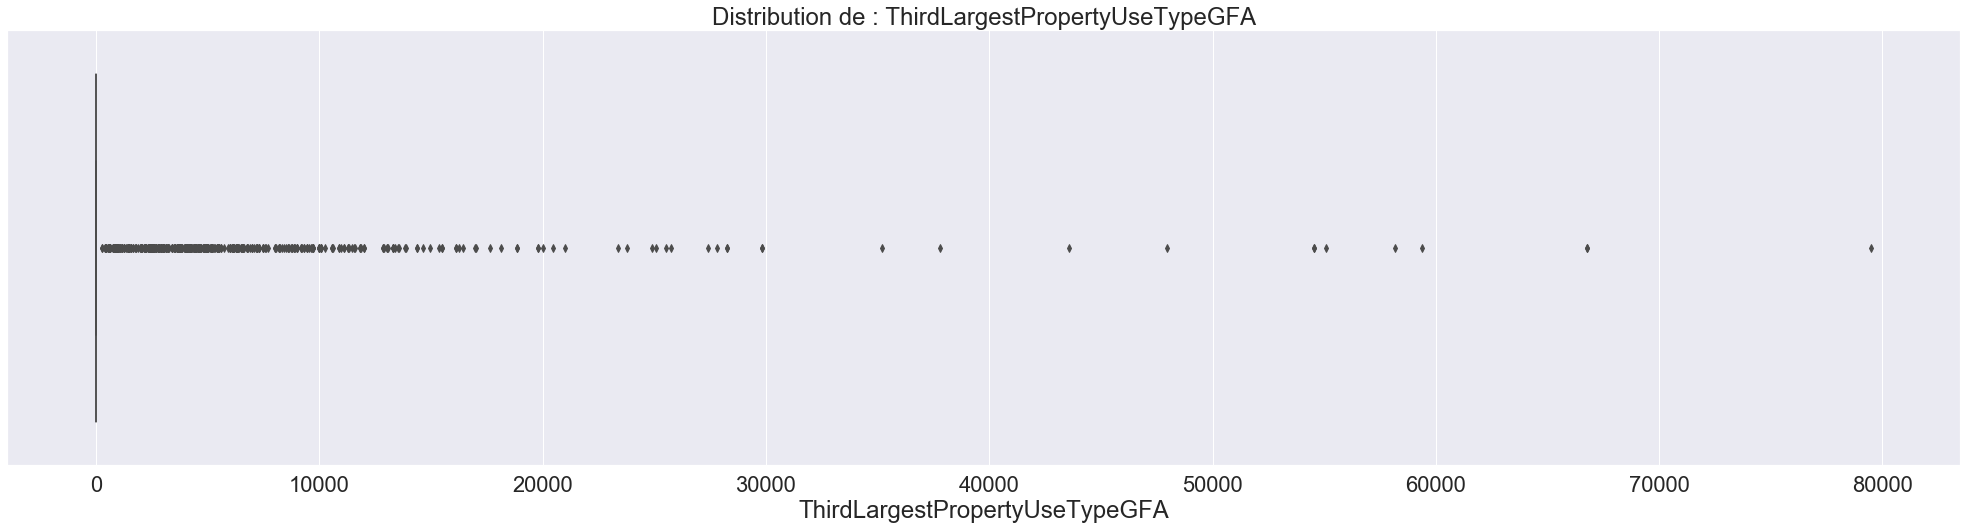

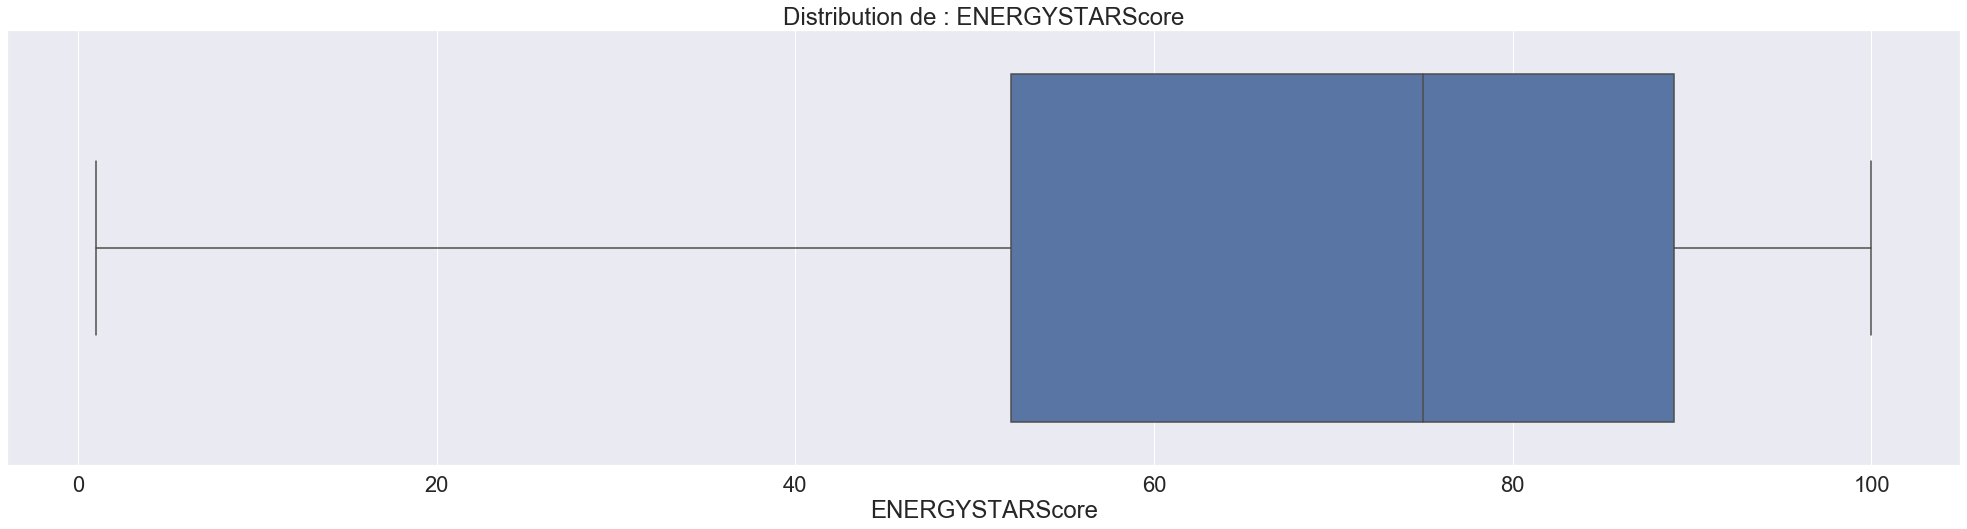

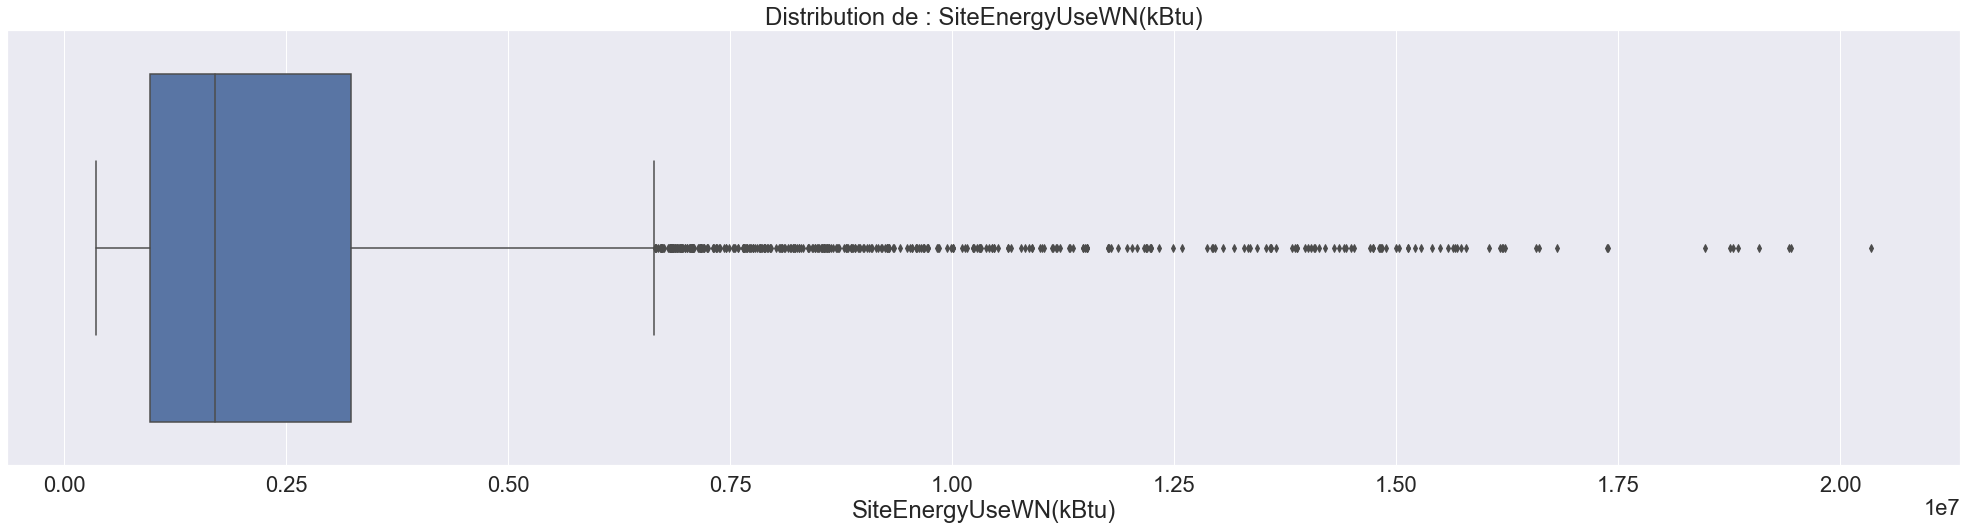

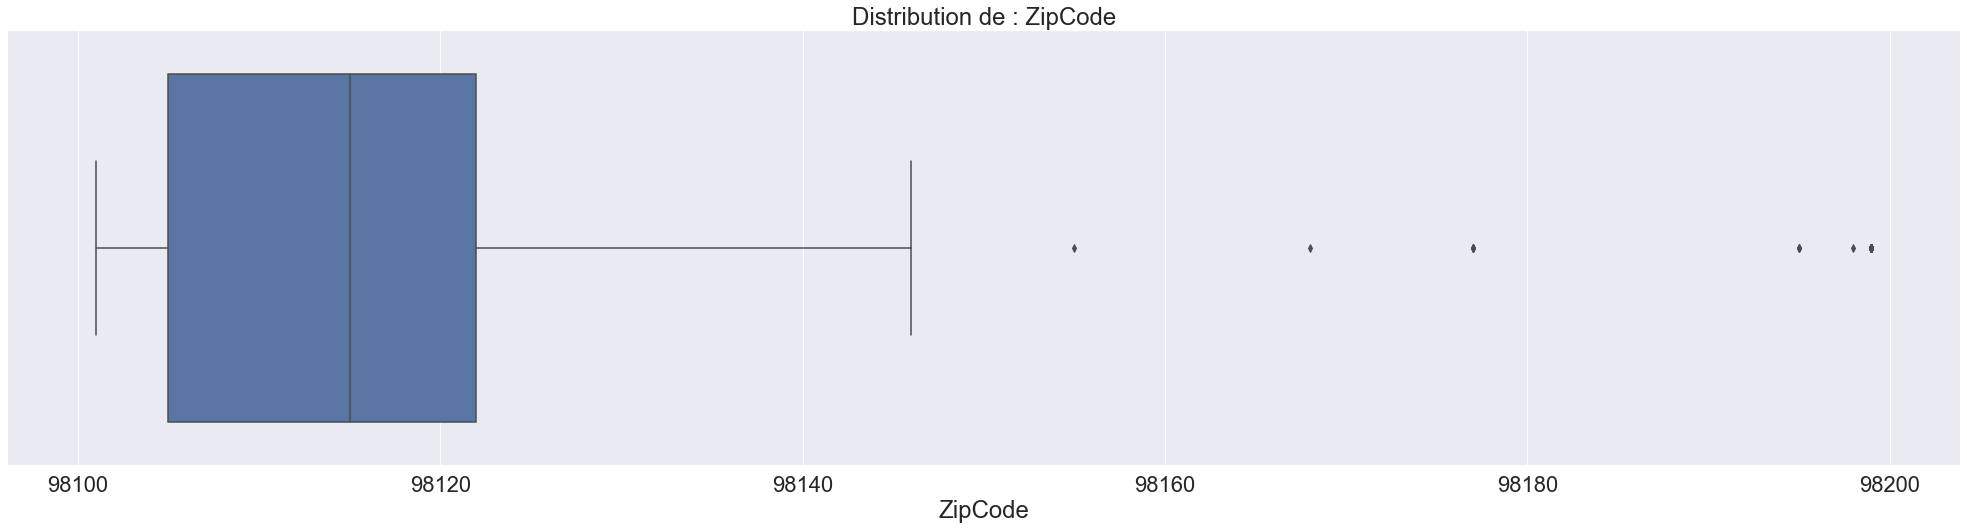

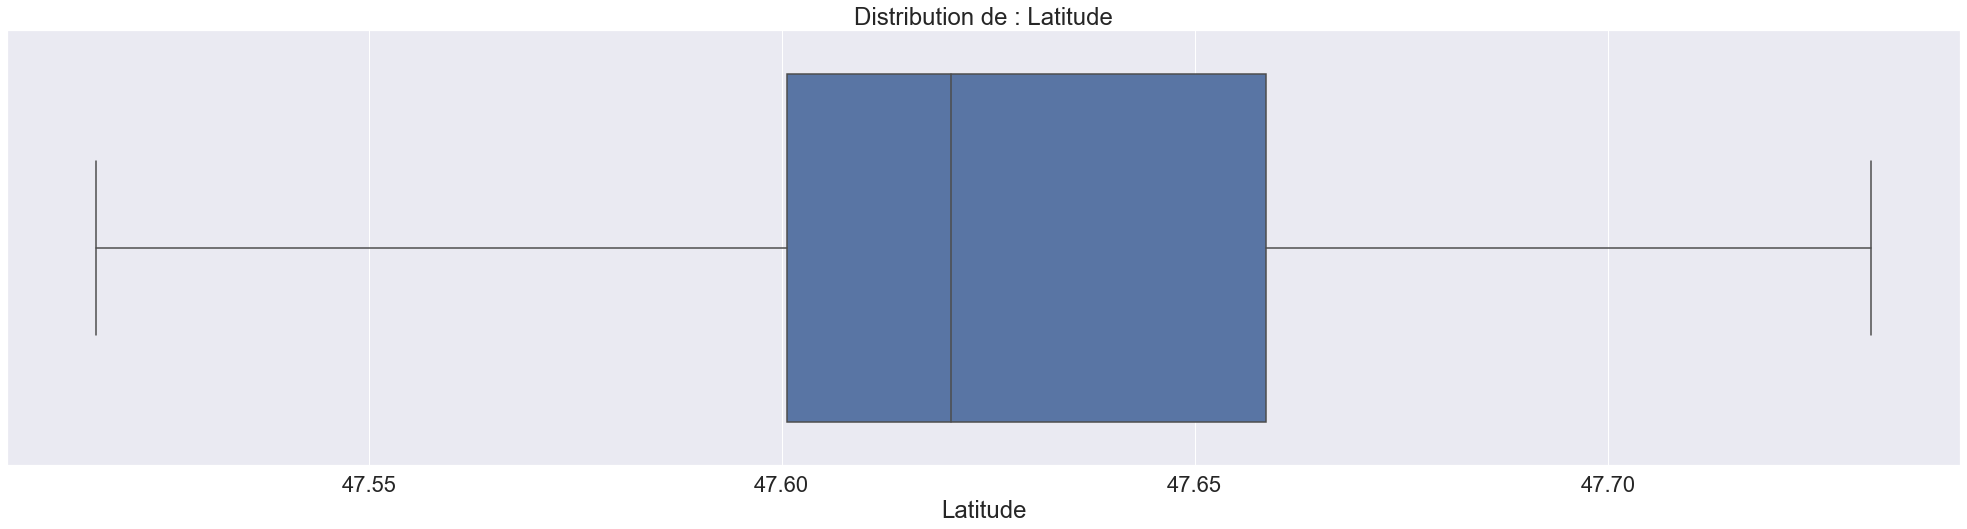

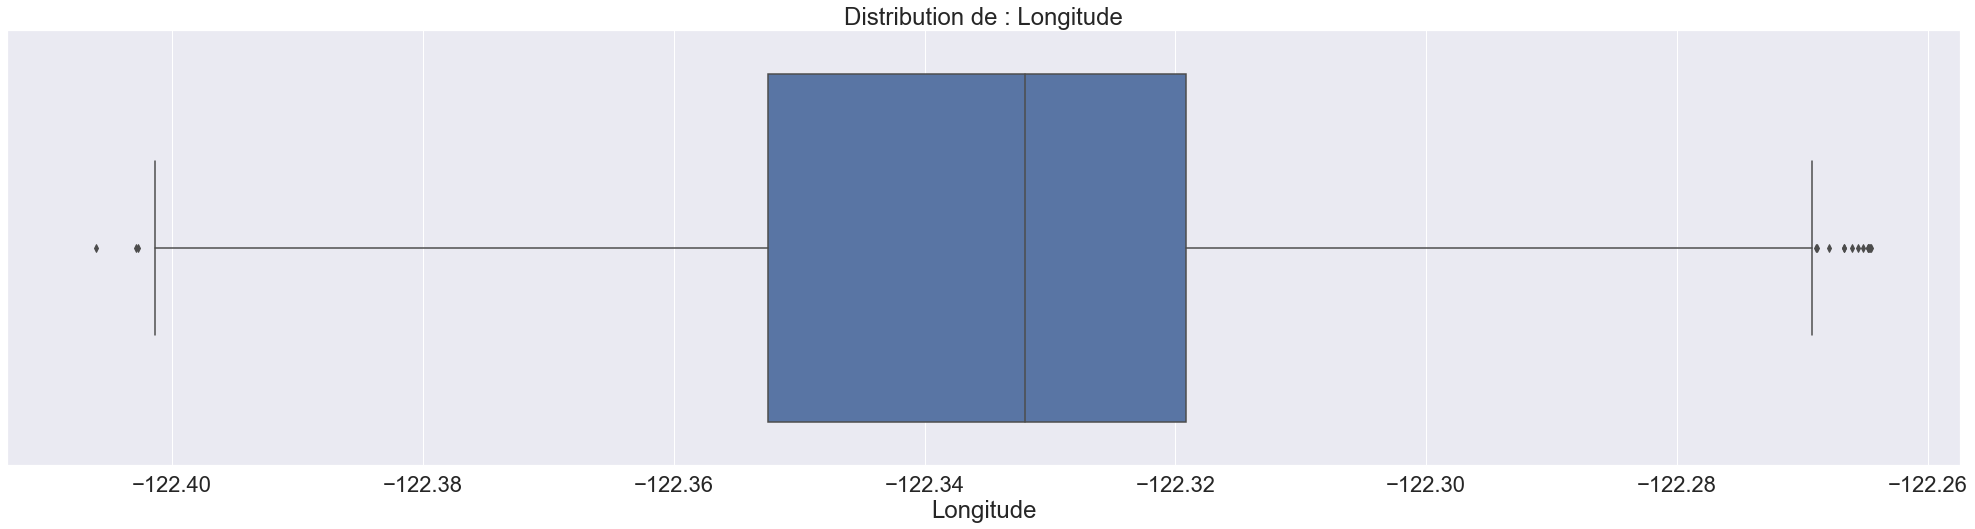

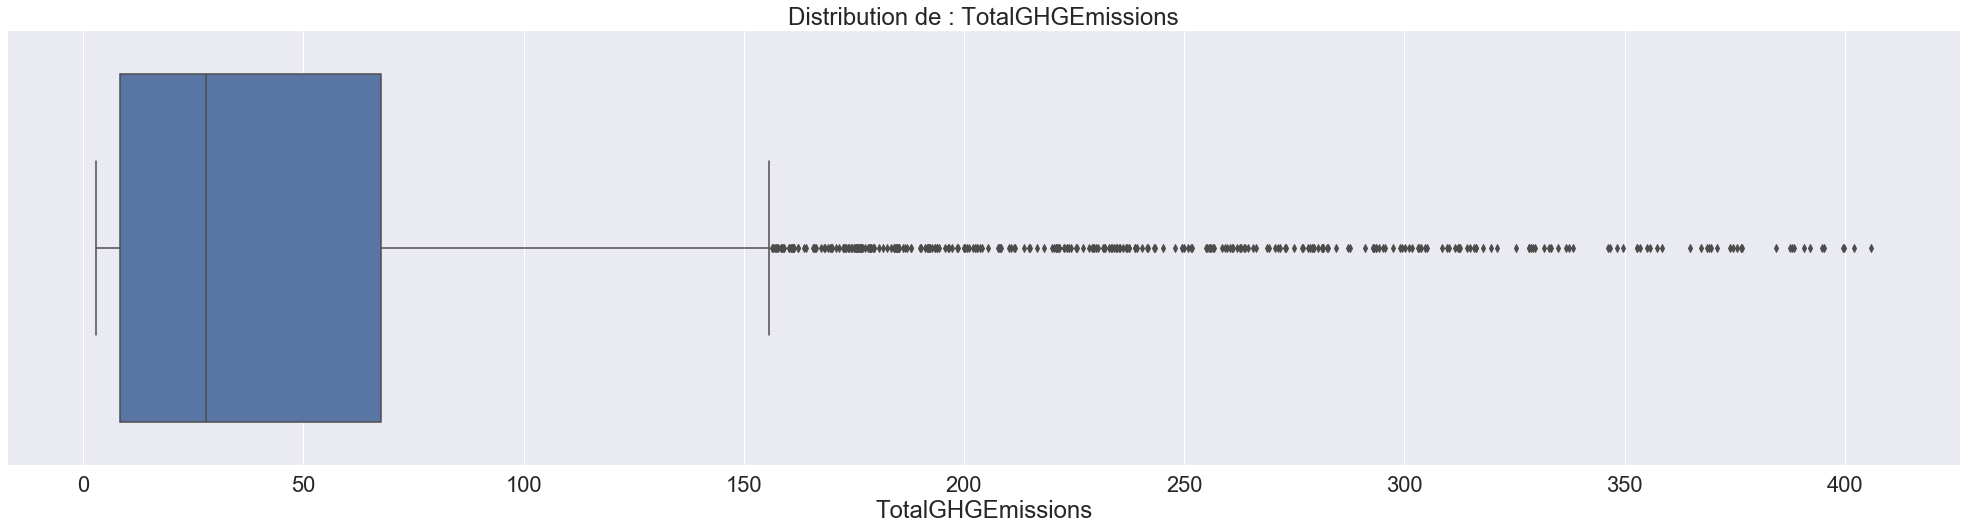

In [119]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (35,8))
    
    sns.boxplot(data[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

## Analyse multivariée

### Matrice de corrélation

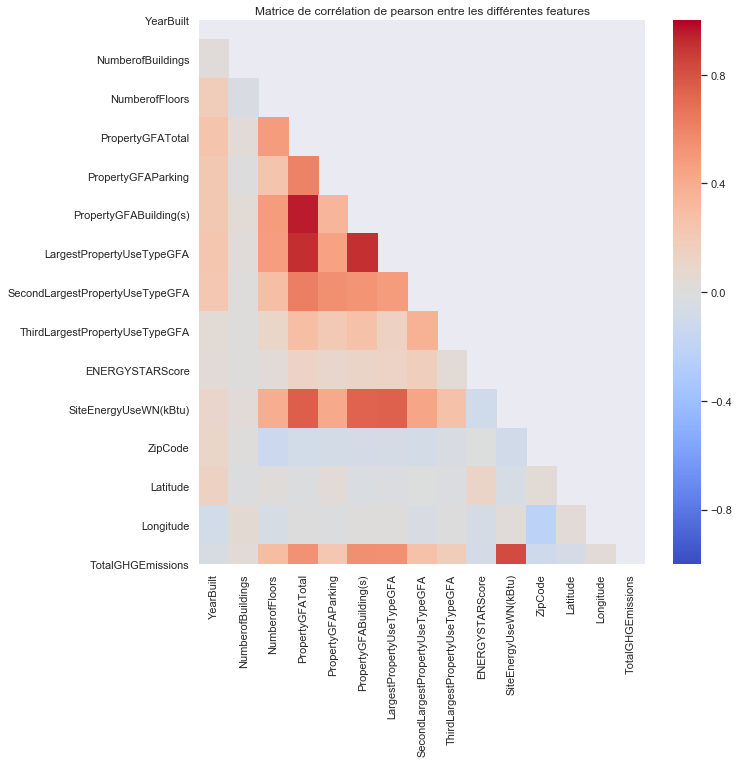

In [120]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
plt.title('Matrice de corrélation de pearson entre les différentes features')

corr = data[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)


**Observations**
* Corrélation importante entre : PropertyGFATotal et PropertyGFABuilding(s) / LargestPropertyUseTypeGFA
* Corrélation importante entre PropertyGBABuilding(s) et LargestPropertyUseTypeGFA
* **Corrélation importante entre TotalGHEmissions et SiteEnergyUseWN(kBtu)** (on notera que ce sont les deux variables qu'on cherche à prédire, ce qui laisse présager)

### Indépendance des variables

In [121]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
def test_chi2(serie1, serie2):
    
    alpha = 0.03    
    
    #H0 : les variables sont indépendantes
    
    #print('tableau de contingence :\n', pd.crosstab(serie1.array, serie2.array))
    tab_contingence = pd.crosstab(serie1.array, serie2.array)
    stat_chi2, p, dof, expected_table = chi2_contingency(tab_contingence.values)
    print('chi2 : {},\np : {},\ndof : {}\n'.format(stat_chi2, p, dof))
    print('tableau de contingence : \n', tab_contingence)
    
    critical = chi2.ppf(1-alpha, dof) #
    #print('critital : ', critical)

    if p <= alpha:
        print('Variables non indépendantes (H0 rejetée) car p = {} <= alpha = {}'.format(p, alpha))
        return False
    
    else:
        print('H0 non rejetée car p = {} >= alpha = {}'.format(p, alpha))
        return True

In [122]:
x = pd.cut(data['SiteEnergyUseWN(kBtu)'], 20)
for column in data.select_dtypes(include = ['int32','float64']).columns:
    print('test d\'indépendance {} / {}'.format('SiteEnergyUseWN(kBtu)',column))
    if data[column].nunique() > 20 :
        y = pd.cut(data[column], 20).astype('category')
    else:
        y = data[column].astype('category')
    test_chi2(x, y)
    #print('__\nX:\nx')
    #print(x)
    #print('__\nX:\nx')
    #print(y)
    

    #table = pd.DataFrame({'nutriscore' : x, column : y})
    #print(table.sample(10))
    print('________________________________________________________________________________________________\n')

test d'indépendance SiteEnergyUseWN(kBtu) / YearBuilt
chi2 : 749.0509367679142,
p : 2.4655254761399413e-29,
dof : 361

tableau de contingence : 
 col_0                         (1899.885, 1905.75]  (1905.75, 1911.5]  \
row_0                                                                  
(339217.209, 1358706.128]     50                   95                  
(1358706.128, 2358205.069]    36                   73                  
(2358205.069, 3357704.009]    13                   33                  
(3357704.009, 4357202.95]     10                   16                  
(4357202.95, 5356701.891]     6                    7                   
(5356701.891, 6356200.831]    5                    4                   
(6356200.831, 7355699.772]    3                    9                   
(7355699.772, 8355198.712]    3                    5                   
(8355198.712, 9354697.653]    2                    2                   
(9354697.653, 10354196.594]   2                    0          

chi2 : 7146.946996461015,
p : 0.0,
dof : 342

tableau de contingence : 
 col_0                         (19405.886, 49705.7]  (49705.7, 79411.4]  \
row_0                                                                    
(339217.209, 1358706.128]     1545                  86                   
(1358706.128, 2358205.069]    652                   253                  
(2358205.069, 3357704.009]    194                   163                  
(3357704.009, 4357202.95]     82                    81                   
(4357202.95, 5356701.891]     33                    47                   
(5356701.891, 6356200.831]    13                    27                   
(6356200.831, 7355699.772]    12                    17                   
(7355699.772, 8355198.712]    3                     12                   
(8355198.712, 9354697.653]    4                     4                    
(9354697.653, 10354196.594]   1                     4                    
(10354196.594, 11353695.534]  0        

chi2 : 3971.172627005636,
p : 0.0,
dof : 247

tableau de contingence : 
 col_0                         (-337.111, 16753.55]  (16753.55, 33509.1]  \
row_0                                                                     
(339217.209, 1358706.128]     1635                  10                    
(1358706.128, 2358205.069]    934                   56                    
(2358205.069, 3357704.009]    437                   30                    
(3357704.009, 4357202.95]     241                   22                    
(4357202.95, 5356701.891]     139                   20                    
(5356701.891, 6356200.831]    95                    7                     
(6356200.831, 7355699.772]    94                    1                     
(7355699.772, 8355198.712]    46                    5                     
(8355198.712, 9354697.653]    41                    1                     
(9354697.653, 10354196.594]   21                    3                     
(10354196.594, 11353695.534

chi2 : 7094.032459864402,
p : 0.0,
dof : 361

tableau de contingence : 
 col_0                         (9642.879, 30916.05]  (30916.05, 51772.1]  \
row_0                                                                     
(339217.209, 1358706.128]     1173                  429                   
(1358706.128, 2358205.069]    376                   390                   
(2358205.069, 3357704.009]    82                    179                   
(3357704.009, 4357202.95]     25                    85                    
(4357202.95, 5356701.891]     17                    32                    
(5356701.891, 6356200.831]    9                     16                    
(6356200.831, 7355699.772]    1                     19                    
(7355699.772, 8355198.712]    5                     6                     
(8355198.712, 9354697.653]    0                     7                     
(9354697.653, 10354196.594]   1                     4                     
(10354196.594, 11353695.534

chi2 : 5181.071669938073,
p : 0.0,
dof : 285

tableau de contingence : 
 col_0                         (-79.507, 3975.35]  (3975.35, 7950.7]  \
row_0                                                                 
(339217.209, 1358706.128]     1601                37                  
(1358706.128, 2358205.069]    934                 40                  
(2358205.069, 3357704.009]    455                 16                  
(3357704.009, 4357202.95]     259                 11                  
(4357202.95, 5356701.891]     171                 9                   
(5356701.891, 6356200.831]    100                 8                   
(6356200.831, 7355699.772]    101                 6                   
(7355699.772, 8355198.712]    50                  7                   
(8355198.712, 9354697.653]    51                  4                   
(9354697.653, 10354196.594]   25                  2                   
(10354196.594, 11353695.534]  15                  5                   
(113

chi2 : 78204.0,
p : 0.0,
dof : 361

tableau de contingence : 
 col_0                         (339217.209, 1358706.128]  \
row_0                                                     
(339217.209, 1358706.128]     1646                        
(1358706.128, 2358205.069]    0                           
(2358205.069, 3357704.009]    0                           
(3357704.009, 4357202.95]     0                           
(4357202.95, 5356701.891]     0                           
(5356701.891, 6356200.831]    0                           
(6356200.831, 7355699.772]    0                           
(7355699.772, 8355198.712]    0                           
(8355198.712, 9354697.653]    0                           
(9354697.653, 10354196.594]   0                           
(10354196.594, 11353695.534]  0                           
(11353695.534, 12353194.475]  0                           
(12353194.475, 13352693.416]  0                           
(13352693.416, 14352192.356]  0                     

chi2 : 619.6074499212988,
p : 6.319552247640282e-16,
dof : 361

tableau de contingence : 
 col_0                         (47.517, 47.528]  (47.528, 47.538]  \
row_0                                                              
(339217.209, 1358706.128]     24                21                 
(1358706.128, 2358205.069]    19                16                 
(2358205.069, 3357704.009]    13                11                 
(3357704.009, 4357202.95]     7                 8                  
(4357202.95, 5356701.891]     2                 8                  
(5356701.891, 6356200.831]    2                 5                  
(6356200.831, 7355699.772]    0                 2                  
(7355699.772, 8355198.712]    1                 0                  
(8355198.712, 9354697.653]    0                 0                  
(9354697.653, 10354196.594]   3                 0                  
(10354196.594, 11353695.534]  0                 1                  
(11353695.534, 12353194.4

chi2 : 7938.366437786432,
p : 0.0,
dof : 361

tableau de contingence : 
 col_0                         (2.497, 23.056]  (23.056, 43.212]  \
row_0                                                             
(339217.209, 1358706.128]     1399             214                
(1358706.128, 2358205.069]    362              235                
(2358205.069, 3357704.009]    109              53                 
(3357704.009, 4357202.95]     6                74                 
(4357202.95, 5356701.891]     0                46                 
(5356701.891, 6356200.831]    0                20                 
(6356200.831, 7355699.772]    0                1                  
(7355699.772, 8355198.712]    0                0                  
(8355198.712, 9354697.653]    0                0                  
(9354697.653, 10354196.594]   0                0                  
(10354196.594, 11353695.534]  0                0                  
(11353695.534, 12353194.475]  0                0        

## Transformation variable de prédiction

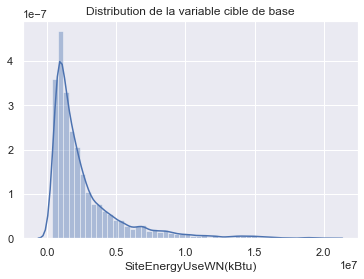

In [123]:
plt.title('Distribution de la variable cible de base')
sns.distplot(data['SiteEnergyUseWN(kBtu)'])

In [124]:

test = np.log(data['SiteEnergyUseWN(kBtu)'])
test1p = np.log1p(data['SiteEnergyUseWN(kBtu)'])
test2 = np.log2(data['SiteEnergyUseWN(kBtu)'])
test2p = np.log2(1+data['SiteEnergyUseWN(kBtu)'])

Pour avoir un bon algorithme, on va modifier l'allure de la distribution pour obtenir une variable dont la distribution se rapproche d'une loi normale

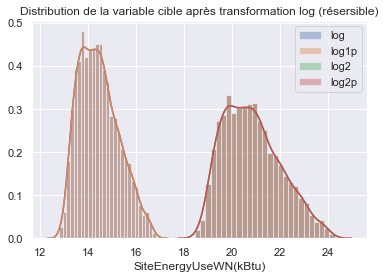

In [125]:
plt.title('Distribution de la variable cible après transformation log (résersible)')
sns.distplot(test)
sns.distplot(test1p)
sns.distplot(test2)
sns.distplot(test2p)
ax = plt.gca()
ax.legend(['log','log1p', 'log2', 'log2p'])

On va conserver la variable après la transformation log2 : 

In [126]:
data['Log2-SiteEnergyUseWN(kBtu)'] = test2p

# Export des données nettoyées 

In [127]:
#data.to_csv('data/data_cleaned.csv', index=False)

# Pipeline d'importation des données et préparation des features

## Fonctions élémentaires

In [128]:
def import_data(data_path1, data_path2):
    '''Importe les deux jeux de données à partir de fichier csv, aligne les colonnes pour les assembler en un seul dataframe'''
    data_2015 = pd.read_csv(data_path1)
    data_2016 = pd.read_csv(data_path2)
    data_2015 = transform_columns(data_2015)
    data_2015['DefaultData'] = data_2015['DefaultData'].map({'Yes' : True, 'No' : False}).head()
    data_2015[['Latitude','Longitude', 'ZipCode']] = data_2015[['Latitude','Longitude', 'ZipCode']].astype('float64')
    data_2015['TotalGHGEmissions'] = data_2015['GHGEmissions(MetricTonsCO2e)']
    
    data_2015['GHGEmissionsIntensity'] = data_2015['GHGEmissionsIntensity(kgCO2e/ft2)']
    data_2015.drop(['GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)'], axis=1, inplace=True)
    data_2015.drop(['Zip Codes'], axis=1, inplace=True)
    
    return pd.concat([data_2015, data_2016], axis=0, sort=False).reset_index()

In [129]:
def transform_columns (dataframe):
    '''Récupère les informations contenues dans la colonne Location pour les 
    ajouter dans des nouvelles colonnes du dataframe.
    La fonction renvoie le dataframe avec les nouvelles colonnes et l'ancienne
    purgée.
    '''
        
    #ajout des informations des colonnes manquantes
    location = pd.DataFrame()
    for line, building_id in zip(dataframe['Location'], data_2015['OSEBuildingID']):
        line = ast.literal_eval(line)
        line = json_normalize(line)
        
        latitude = line['latitude'][0]
        longitude = line['longitude'][0]

        line = pd.DataFrame(ast.literal_eval(line['human_address'][0]), index=[0])
        location = pd.concat([location,
                             pd.DataFrame({
                       'Building_id' : building_id,
                       'Address' : line['address'][0],
                       'City' : line['city'][0],
                       'State' : line['state'][0],
                       'ZipCode' : line['zip'][0],
                       'Latitude' : latitude,
                       'Longitude': longitude }, index=[0])],
                             axis=0)
    return pd.merge(dataframe, location, left_on = 'OSEBuildingID', 
                    right_on = 'Building_id').drop(['Building_id','Location'],axis=1)




In [130]:
def clean_values(dataframe):
    '''Nettoyages divers des valeurs du jeu de données : données proches ou manquantes / incohérentes'''
    dataframe['PrimaryPropertyType'] = dataframe['PrimaryPropertyType'].str.replace('\n','')
    dataframe['City'].replace('SEATTLE', 'Seattle', inplace=True)
    dataframe['ComplianceStatus'].replace('Missing Data', np.nan, inplace=True)
    dataframe['ComplianceStatus'].replace('Error - Correct Default Data', np.nan, inplace=True)
    dataframe['ComplianceStatus'].replace('Not Compliant', 'Non-Compliant', inplace=True)
    dataframe['Neighborhood'].replace('Central', 'CENTRAL', inplace=True)
    dataframe['Neighborhood'].replace('Ballard', 'BALLARD', inplace=True)
    dataframe['Neighborhood'].replace('North', 'NORTH', inplace=True)
    dataframe['Neighborhood'].replace('Northwest', 'NORTHWEST', inplace=True)
    dataframe['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
    dataframe['Neighborhood'].replace('Delridge', 'DELRIDGE', inplace=True)
    dataframe['Outlier'].replace('Low outlier', 'Low Outlier', inplace=True)
    dataframe['Outlier'].replace('High outlier', 'High Outlier', inplace=True)
    dataframe[dataframe['NumberofBuildings'] == 0]['NumberofBuildings'] = 1

    return dataframe

In [131]:
from sklearn.neighbors import KDTree

def delete_univariate_outliers(dataframe):
    '''Suppression des valeurs extrêmes du dataset - on exclut le centile le plus extreme
    suppression des données négatives et des valeurs supérieures à 100 g pour les indices ramenés à 100 g'''
    #valeurs extremes
    index_nan = []
    index_nan_flat = []
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :

        
        index_nan.append(dataframe.loc[dataframe[column] > dataframe[column].quantile(0.995)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < dataframe[column].quantile(0.005)].index.tolist())

    for sublist in index_nan:
        for item in sublist:
            index_nan_flat.append(item)
                
    #suppression des doublons
    index_nan_flat = list(dict.fromkeys(index_nan_flat))
    dataframe[column].loc[index_nan_flat] = np.nan

            
    return dataframe

def delete_multivariate_outliers(dataframe):
    '''Suppression des outliers éloignés de leurs plus proches voisins (discrimination du centile 
    le plus éloigné par la distance de minkowski de chaque observation à ses 3 plus proches voisins)'''

    numeric_data = dataframe.select_dtypes(['int32', 'float64']).copy().dropna(axis=0).dropna(axis=1)
    print(numeric_data.shape)
    kdt = KDTree(numeric_data, leaf_size = 40, metric='minkowski')
    dist, ind = kdt.query(numeric_data, k=3, return_distance=True)

    numeric_data['3N_distance'] = np.sum(dist, axis=1)    
    numeric_data = numeric_data[numeric_data['3N_distance'] < numeric_data['3N_distance'].quantile(0.99)]
    index_to_drop = numeric_data.index.tolist()
    dataframe = dataframe.drop(index_to_drop, axis=0)

    return dataframe

def clean_outliers(dataframe):
    print('........Suppression des outliers univariés')
    dataframe = delete_univariate_outliers(dataframe)
    print('........Suppression des outliers multivariés')
    dataframe = delete_multivariate_outliers(dataframe)
    return dataframe
    


In [132]:
def completion_nan(dataframe):
    '''Remplace les NaN par des valeurs définies quand applicable'''
    
    dataframe['Outlier'] = dataframe['Outlier'].astype('object')
    dataframe['Outlier'].fillna('Normal', inplace=True)
    dataframe['Outlier'] = dataframe['Outlier'].astype('category')
    dataframe[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']] = dataframe[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']].fillna(0, )
    dataframe[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']] = dataframe[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']].fillna('No Use')
    dataframe['LargestPropertyUseType'] = dataframe['LargestPropertyUseType'].fillna('No information')
    
    
    index_to_fill = dataframe[(dataframe['LargestPropertyUseTypeGFA'].isna()) & (dataframe['SecondLargestPropertyUseTypeGFA'] == 0)]['LargestPropertyUseTypeGFA'].index.tolist()
    dataframe.loc[index_to_fill, 'LargestPropertyUseTypeGFA'] = dataframe.loc[index_to_fill, 'PropertyGFABuilding(s)']
    
    return dataframe

In [133]:
def clean_categories(dataframe):
    '''Regroupe les contenu des colonnes ci-dessous dans des categories prédéfinies '''
    property_use_types_columns = ['SecondLargestPropertyUseType',
                         'LargestPropertyUseType',
                         'ThirdLargestPropertyUseType',
                         'PrimaryPropertyType']
    
    usetype_dict = {
                'Retail Store' : 'Retail',
                'Supermarket/Grocery Store' : 'Retail',
                'Repair Services (Vehicle, Shoe, Locksmith, etc)' : 'Retail',
                'Automobile Dealership': 'Retail',
                'Convenience Store without Gas Station': 'Retail',
                'Personal Services': 'Retail',
                'Enclosed Mall': 'Retail',
                'Strip Mall': 'Retail',
                'Wholesale Club/Supercenter': 'Retail',
                'Other - Mall': 'Retail',
                'Supermarket / Grocery Stor': 'Retail',
                'Retail (Health/Beauty, Dry Cleaning, etc)' : 'Retail',
                'Retaile' : 'Retail',
                
                'Food Sales': 'Leisure',
                'Restaurant' : 'Leisure',
                'Other - Restaurant/Bar' : 'Leisure',
                'Food Service': 'Leisure' ,
                'Worship Facility': 'Leisure',
                'Other - Recreation': 'Leisure',
                'Other - Entertainment/Public Assembly': 'Leisure',
                'Performing Arts': 'Leisure',
                'Bar/Nightclub': 'Leisure',
                'Movie Theater': 'Leisure',
                'Museum': 'Leisure',
                'Social/Meeting Hall': 'Leisure',
                'Fitness Center/Health Club/Gym': 'Leisure',
                'Lifestyle Center ': 'Leisure',
                'Fast Food Restaurant': 'Leisure',
                'Other - Leisure/Bar' : 'Leisure',
                'Lifestyle Center' : 'Leisure',
                'Fast Food Leisure' : 'Leisure',
        
                
                'Hotel' : 'Residence/Hotel/Senior Care/Housing',
                'Mid-Rise Multifamily' : 'Residence/Hotel/Senior Care/Housing',
                'Low-Rise Multifamily' : 'Residence/Hotel/Senior Care/Housing',
                'Mixed Use Property' : 'Residence/Hotel/Senior Care/Housing',
                'Multifamily Housing' : 'Residence/Hotel/Senior Care/Housing',
                'Other - Lodging/Residential': 'Residence/Hotel/Senior Care/Housing',
                'Residence Hall/Dormitory': 'Residence/Hotel/Senior Care/Housing',
                'Senior Care Community' :'Residence/Hotel/Senior Care/Housing',
                'Residential Care Facility' : 'Residence/Hotel/Senior Care/Housing',
                'High-Rise Multifamily': 'Residence/Hotel/Senior Care/Housing',
                'Prison/Incarceration': 'Residence/Hotel/Senior Care/Housing',
                'Residence Hall': 'Residence/Hotel/Senior Care/Housing',
                
                'Medical Office' : 'Health',
                'Urgent Care/Clinic/Other Outpatient' : 'Health',
                'Laboratory' : 'Health',
                'Hospital (General Medical & Surgical)' : 'Health',
                'Health (General Medical & Surgical)' : 'Health',
                'Other/Specialty Hospital' : 'Health',
                'Outpatient Rehabilitation/Physical Therapy' : 'Health',
                'Hospital' : 'Health',
        
                'Small- and Mid-Sized Office' : 'Offices',
                'Other - Services' : 'Offices',
                'Bank Branch' : 'Offices',
                'Financial Office' : 'Offices',
                'Other - Public Services': 'Offices',
                'Police Station' : 'Offices',
                'Courthouse' : 'Offices',
                'Large Office' : 'Offices',
                'Offices' : 'Office',

                'K-12 School' : 'Education',
                'SPS-District K-12' : 'Education',
                'Other - Education': 'Education',
                'Vocational School' : 'Education', 
                'Adult Education' : 'Education',
                'Pre-school/Daycare': 'Education',
                'University': 'Education',
                'College/University': 'Education',
                'Library': 'Education',
                'College/Education' : 'Education',
        
                 'Self-Storage Facility' : 'Storage',
                 'Non-Refrigerated Warehouse' : 'Storage',
                 'Distribution Center' : 'Storage',
        
                'Data Center' : 'Facility',
                'Manufacturing/Industrial Plant' : 'Facility',
                'Refrigerated Warehouse' : 'Facility',
                
                'Fire Station' : 'Other',
                'Other - Utility' : 'Other',
                'No information' : 'Other',
                'Swimming Pool' : 'Other',
                'No Use' : 'Other',
                'Repair Services (Vehicle, Shoe, Locksmith, etc)' : 'Other'
               }
    
    
    for column in property_use_types_columns:
        dataframe[column] = dataframe[column].astype('object')
        dataframe[column] = dataframe[column].replace(usetype_dict, regex=False)
        #dataframe[column] = dataframe[column].map(usetype_dict)
        
        dataframe[column] = dataframe[column].astype('category')

    return dataframe


In [134]:
def clean_nan(dataframe):
    '''Suppression des colonnes qui comportent trop de NaN et des lignes non informatives pour notre problématique'''
    dataframe.dropna(how = 'all', axis=0, inplace=True)
    print(dataframe.shape)
    dataframe.drop(dataframe[dataframe['SiteEnergyUseWN(kBtu)'].isna()].index.tolist(), axis=0, inplace=True)
    print(dataframe.shape)
    dataframe.drop(dataframe[dataframe['TotalGHGEmissions'].isna()].index.tolist(), axis=0, inplace=True)
    print(dataframe.shape)
    index_to_drop = dataframe.drop(['ENERGYSTARScore'], axis=1)[dataframe.drop(['ENERGYSTARScore'],axis=1).isna().any(axis=1)].index
    return dataframe.drop(index_to_drop, axis=0)

In [135]:
def diff_consuption_outliers(dataframe):
    '''Supprime les bâtiments dont la différence de consommation est trop importante d'une année à l'autre'''
    spread = dataframe.groupby("OSEBuildingID").filter(lambda x: len(x) > 1).sort_values(by='OSEBuildingID').groupby('OSEBuildingID')['SiteEnergyUseWN(kBtu)'].agg(['max','min'])#.diff(axis=1)['min'].dropna()
    spread['min'] = np.true_divide(spread['min'], spread['max'])
    spread['max'] = np.true_divide(spread['max'], spread['max'])
    spread = spread.diff(axis=1)
    spread = spread.multiply(100)
    spread = spread.dropna(how='all', axis=1)
    spread = spread.abs()
    
    std = spread.describe().T[['mean', 'min', 'max', '50%', 'std']]['std'][0]
    mean = spread.describe().T[['mean', 'min', 'max', '50%', 'std']]['mean'][0]
    
    
    id_high_spread = spread[spread['min']>(mean + 3 * std)].reset_index()['OSEBuildingID'].values
    
    return dataframe[~dataframe['OSEBuildingID'].isin(id_high_spread)]


In [136]:
def drop_columns(dataframe, columns):
    for column in columns:
        try:
            dataframe.drop(column, axis=1, inplace=True)
        except:
            print('colonne {} absente du jeu de donnée'.format(column))
            
    return dataframe

## Fonction complète : import des 2 datasets

### Fonction d'import

In [137]:
def import_clean(data_path1, data_path2):
    '''Pipeline complet de traitement des données, comprenant l'import et le nettoyage du jeu de données'''

    print('Import des données...')
    try:
        dataframe= import_data(data_path1, data_path2)
        
    except:
        print('Echec')
    print('.....', dataframe.shape)
    
    print('Nettoyage Valeurs...')
    try:
        dataframe = clean_values(dataframe)
    except:
        print('Echec')
    print('.....', dataframe.shape)

    print('Catégorisation des données...')
    try:
        columns_to_categorize = ['DataYear', 'BuildingType', 'CouncilDistrictCode',
                        'ComplianceStatus', 'Outlier', 'Neighborhood']
        dataframe[columns_to_categorize] = dataframe[columns_to_categorize].astype('category')
    except:
        print('Echec')
    print('.....', dataframe.shape)
    
    columns_to_drop = ['City Council Districts',
                    '2010 Census Tracts', 
                    'Seattle Police Department Micro Community Policing Plan Areas', 
                    'Comment',
                    'Comments',
                    #'OSEBuildingID', #non utilisé
                    'City', #1 unique valeur
                    'State', #1 unique valeur
                    'PropertyName', #similaire à ID
                    'TaxParcelIdentificationNumber', #similaire à ID
                    'ListOfAllPropertyUseTypes', #donnée figurant dans d'autres colonnes
                    #'DataYear', 
                    'SPD Beats', #données police / trop d'infos manquantes
                    'ComplianceStatus', #infos sur la compétude des données à supprimer
                    'DefaultData', #utilité de la variable inconnue
                    'Address', #non conservé (latitude et longitude préférées)
                    'ZipCode', # non conservé (latitude et longitude préférées),
                    'YearsENERGYSTARCertified',
                    'SiteEUI(kBtu/sf)',
                    'SiteEUIWN(kBtu/sf)',
                    'SourceEUI(kBtu/sf)',
                    'SourceEUIWN(kBtu/sf)',
                    'SiteEnergyUse(kBtu)',
                    'SteamUse(kBtu)',
                    'Electricity(kWh)',
                    'Electricity(kBtu)',
                    'NaturalGas(therms)',
                    'NaturalGas(kBtu)',
                    'OtherFuelUse(kBtu)',
                    'GHGEmissionsIntensity']

    print('Suppression des colonnes inutilisées...')
    try:
        dataframe = drop_columns(dataframe, columns_to_drop)
    except:
        print('Echec')
    print('.....', dataframe.shape)

    print('Nettoyage des outliers...')
    try:
        dataframe = clean_outliers(dataframe)
    except:
        print('Echec')
    print('.....', dataframe.shape)
        
    print('Complétion des NaN...')
    try:
        dataframe = completion_nan(dataframe)
    except:
        print('Echec')
    print('.....', dataframe.shape)
    
    print('Catégorisation des variables')
    try:
        dataframe = clean_categories(dataframe)
    except:
        print('Echec')
    print('.....', dataframe.shape)
    
    print('Nettoyage des NaN...')
    try:
        dataframe = clean_nan(dataframe)
    except:
        print('Echec')
    print('.....', dataframe.shape)
        
    
    print('Nettoyage des outliers de consommation...')
    try:
        dataframe = diff_consuption_outliers(dataframe)
        dataframe.drop({'OSEBuildingID'}, axis=1, inplace=True)
    except:
        print('Echec')
    print('.....', dataframe.shape)


    print('Transformation en log2 de la variable à prédire...')
    try:
        dataframe['Log2-SiteEnergyUseWN(kBtu)'] = np.log2(1+dataframe['SiteEnergyUseWN(kBtu)'])
    except:
        print('Echec')
    print('.....', dataframe.shape)

    print('Export du fichier...')
    try:
        dataframe.to_csv('data/data_cleaned.csv', index=False)
        print('.....Enregistrement du fichier nettoyé réalisé avec succès (voir ./data/data_cleaned.csv)')
    except:
        print('Echec')
    print('.....', dataframe.shape)
    
    print('Fin du nettoyage des données')
    return dataframe

### Application du pipeline d'import

In [144]:
path_2015 = 'data/2015-building-energy-benchmarking.csv'
path_2016 = 'data/2016-building-energy-benchmarking.csv'
data_cleaned = import_clean(path_2015, path_2016)

Import des données...
..... (6716, 53)
Nettoyage Valeurs...
..... (6716, 53)
Catégorisation des données...
..... (6716, 53)
Suppression des colonnes inutilisées...
..... (6716, 25)
Nettoyage des outliers...
........Suppression des outliers univariés


C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Vincent\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


........Suppression des outliers multivariés
(519, 10)
..... (6203, 25)
Complétion des NaN...
..... (6203, 25)
Catégorisation des variables
..... (6203, 25)
Nettoyage des NaN...
(6203, 25)
(6187, 25)
(5877, 25)
..... (5874, 25)
Nettoyage des outliers de consommation...
..... (5748, 24)
Transformation en log2 de la variable à prédire...
..... (5748, 25)
Export du fichier...
.....Enregistrement du fichier nettoyé réalisé avec succès (voir ./data/data_cleaned.csv)
..... (5748, 25)
Fin du nettoyage des données


In [145]:
data_cleaned.shape

(5748, 25)

In [146]:
data_cleaned.isna().sum()

index                              0   
DataYear                           0   
BuildingType                       0   
PrimaryPropertyType                0   
CouncilDistrictCode                0   
Neighborhood                       0   
YearBuilt                          0   
NumberofBuildings                  0   
NumberofFloors                     0   
PropertyGFATotal                   0   
PropertyGFAParking                 0   
PropertyGFABuilding(s)             0   
LargestPropertyUseType             0   
LargestPropertyUseTypeGFA          0   
SecondLargestPropertyUseType       0   
SecondLargestPropertyUseTypeGFA    0   
ThirdLargestPropertyUseType        0   
ThirdLargestPropertyUseTypeGFA     0   
ENERGYSTARScore                    1459
SiteEnergyUseWN(kBtu)              0   
Outlier                            0   
Latitude                           0   
Longitude                          0   
TotalGHGEmissions                  0   
Log2-SiteEnergyUseWN(kBtu)         0   


In [147]:
data_cleaned.head()

,index,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),Outlier,Latitude,Longitude,TotalGHGEmissions,Log2-SiteEnergyUseWN(kBtu)
0,0,2015,NonResidential,Residence/Hotel/Senior Care/Housing,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Residence/Hotel/Senior Care/Housing,88434.0,Other,0.0,Other,0.0,65.0,7097539.0,Normal,47.612190,-122.337997,249.43,22.758888
5,5,2015,Nonresidential COS,Other,7,DOWNTOWN,1999,1.0,2.0,97288,37198,60090,Offices,88830.0,Other,0.0,Other,0.0,NaN,13045258.0,Normal,47.616439,-122.336764,304.62,23.637022
6,6,2015,NonResidential,Residence/Hotel/Senior Care/Housing,7,DOWNTOWN,1926,1.0,11.0,83008,0,83008,Residence/Hotel/Senior Care/Housing,81352.0,Other,0.0,Other,0.0,25.0,6477493.0,Normal,47.614114,-122.332741,208.46,22.627004
7,7,2015,NonResidential,Other,7,DOWNTOWN,1926,1.0,8.0,102761,0,102761,Leisure,102761.0,Other,0.0,Other,0.0,NaN,7380086.0,Normal,47.612902,-122.331309,199.99,22.815206
8,8,2015,NonResidential,Residence/Hotel/Senior Care/Housing,7,DOWNTOWN,1904,1.0,15.0,163984,0,163984,Residence/Hotel/Senior Care/Housing,163984.0,Other,0.0,Other,0.0,46.0,13589025.0,Normal,47.602589,-122.332553,331.61,23.695939


##  Fonction d'import d'un unique dataset

In [148]:
def import_clean_unique(data_path, year_type = 2016):
    '''Pipeline complet de traitement des données, comprenant l'import et le nettoyage du jeu de données'''
    
    print('Import des données...')
    try:
        dataframe = pd.read_csv(data_path)
        if year_type != 2016: 
            print('    Type de jeu de données : 2015')
            dataframe = transform_columns(dataframe)
            dataframe['DefaultData'] = dataframe['DefaultData'].map({'Yes' : True, 'No' : False}).head()
            dataframe[['Latitude','Longitude', 'ZipCode']] = dataframe[['Latitude','Longitude', 'ZipCode']].astype('float64')
            dataframe['TotalGHGEmissions'] = dataframe['GHGEmissions(MetricTonsCO2e)']

            dataframe['GHGEmissionsIntensity'] = dataframe['GHGEmissionsIntensity(kgCO2e/ft2)']
            dataframe.drop(['GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)'], axis=1, inplace=True)
            dataframe.drop(['Zip Codes'], axis=1, inplace=True)
        else:
            print('    Type de jeu de données : 2016')
    except:
        print('Echec')
    print('.....', dataframe.shape)
    
    print('Nettoyage Valeurs...')
    try:
        dataframe = clean_values(dataframe)
    except:
        print('Echec')
    print('.....', dataframe.shape)

    print('Catégorisation des données...')
    try:
        columns_to_categorize = ['DataYear', 'BuildingType', 'CouncilDistrictCode',
                        'ComplianceStatus', 'Outlier', 'Neighborhood']
        dataframe[columns_to_categorize] = dataframe[columns_to_categorize].astype('category')
    except:
        print('Echec')
    print('.....', dataframe.shape)
    
    columns_to_drop = ['City Council Districts',
                    '2010 Census Tracts', 
                    'Seattle Police Department Micro Community Policing Plan Areas', 
                    'Comment',
                    'Comments',
                    #'OSEBuildingID', #non utilisé
                    'City', #1 unique valeur
                    'State', #1 unique valeur
                    'PropertyName', #similaire à ID
                    'TaxParcelIdentificationNumber', #similaire à ID
                    'ListOfAllPropertyUseTypes', #donnée figurant dans d'autres colonnes
                    #'DataYear', 
                    'SPD Beats', #données police / trop d'infos manquantes
                    'ComplianceStatus', #infos sur la compétude des données à supprimer
                    'DefaultData', #utilité de la variable inconnue
                    'Address', #non conservé (latitude et longitude préférées)
                    'ZipCode', # non conservé (latitude et longitude préférées),
                    'YearsENERGYSTARCertified',
                    'SiteEUI(kBtu/sf)',
                    'SiteEUIWN(kBtu/sf)',
                    'SourceEUI(kBtu/sf)',
                    'SourceEUIWN(kBtu/sf)',
                    'SiteEnergyUse(kBtu)',
                    'SteamUse(kBtu)',
                    'Electricity(kWh)',
                    'Electricity(kBtu)',
                    'NaturalGas(therms)',
                    'NaturalGas(kBtu)',
                    'OtherFuelUse(kBtu)',
                    'GHGEmissionsIntensity']

    print('Suppression des colonnes inutilisées...')
    try:
        dataframe = drop_columns(dataframe, columns_to_drop)
    except:
        print('Echec')
    print('.....', dataframe.shape)

    print('Nettoyage des outliers...')
    try:
        dataframe = clean_outliers(dataframe)
    except:
        print('Echec')
    print('.....', dataframe.shape)
        
    print('Complétion des NaN...')
    try:
        dataframe = completion_nan(dataframe)
    except:
        print('Echec')
    print('.....', dataframe.shape)
    
    print('Catégorisation des variables')
    try:
        dataframe = clean_categories(dataframe)
    except:
        print('Echec')
    print('.....', dataframe.shape)
    
    print('Nettoyage des NaN...')
    try:
        dataframe = clean_nan(dataframe)
    except:
        print('Echec')
    print('.....', dataframe.shape)
        
    
    print('Nettoyage des outliers de consommation...')
    try:
        dataframe = diff_consuption_outliers(dataframe)
        dataframe.drop({'OSEBuildingID'}, axis=1, inplace=True)
    except:
        print('Echec')
    print('.....', dataframe.shape)


    print('Transformation en log2 de la variable à prédire...')
    try:
        dataframe['Log2-SiteEnergyUseWN(kBtu)'] = np.log2(1+dataframe['SiteEnergyUseWN(kBtu)'])
    except:
        print('Echec')
    print('.....', dataframe.shape)

    print('Export du fichier...')
    try:
        dataframe.to_csv('data/data_cleaned.csv', index=False)
        print('.....Enregistrement du fichier nettoyé réalisé avec succès (voir ./data/data_cleaned.csv)')
    except:
        print('Echec')
    print('.....', dataframe.shape)
    
    print('Fin du nettoyage des données')
    return dataframe

# Modélisation : voir autre notebook